# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()
# sessionInfo()
Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/bin/python")

suppressMessages(library(Seurat))
suppressMessages(library(Signac))
 suppressMessages(library(EnsDb.Hsapiens.v86)) 
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(pheatmap))
suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
library("ggrepel")



[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC/lib/R/library"

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
"package 'qlcMatrix' was built under R version 4.3.3"
Warning message:
"package 'slam' was built under R version 4.3.3"
Warning message:
"package 'sparsesvd' was built under R version 4.3.3"
Warning message:
"package 'ggeasy' was built under R version 4.3.3"
Warning message:
"package 'svglite' was built under R version 4.3.3"
Warning message:
"package 'ape' was built under R version 4.3.3"
Warning message:
"pack

# Checkpoint after integrative genotyping

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/processing_outputs/")

adata<-readRDS(file="merged_processed_presentation_updated_integrative_genotyping.rds")

adata

An object of class Seurat 
445320 features across 37504 samples within 4 assays 
Active assay: SCT (31512 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, RNA_raw, ATAC
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [3]:
colnames(adata@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.2"                        "wsnn_res.0.5"                     
[65] "wsnn_res.0.25"                     "CellTypist_BMA_label"             
[67] "CellTypist_BMA_conf_score"         "CellTypist_IPSCs_label"           
[69] "CellTypist_IPSCs_conf_score"       "CellTypist_BMA_label_filtered"    
[71] "CellTypist_IPSCs_label_filtered"   "time_point"                       
[73] "time"                              "nucleosome_signal"                
[75] "nucleosome_percentile"             "FRiP"                             
[77] "atac_pct_reads_in_peaks"           "my_anot"                          
[79] "FOI"                               "my_anot_updated"                  
[81] "majority_voting_BMA"               "majority_voting_iPSCs"            
[83] "current_anot"                      "Assignation_demux_NO_CB"          
[85] "Assigned_GFPbc_demux_NO_CB"        "Assignation_demux_CB"             
[87] "Assigned_GFPbc_demux_CB"           "Assigned_GFPbc_integral"

# Create a genotype factor

In [4]:

summary(adata@meta.data$Assigned_GFPbc_integral)

adata@meta.data$Assigned_GFPgenotype_integral<-NA

adata@meta.data$Assigned_GFPgenotype_integral[which(adata@meta.data$Assigned_GFPbc_integral%in%c('chrGFP_WTA','chrGFP_WTB','chrGFP_WTC'))]<-'wt'
adata@meta.data$Assigned_GFPgenotype_integral[which(adata@meta.data$Assigned_GFPbc_integral%in%c('chrGFP_rs1','chrGFP_rs2','chrGFP_rs3'))]<-'CHEK2 T/T'
adata@meta.data$Assigned_GFPgenotype_integral[which(adata@meta.data$Assigned_GFPbc_integral%in%c('chrGFP_R882H1','chrGFP_R882H2','chrGFP_R882H3'))]<-'DNMT3A R882H'
adata@meta.data$Assigned_GFPgenotype_integral[which(adata@meta.data$Assigned_GFPbc_integral%in%c('chrGFP_rs_R882H1','chrGFP_rs_R882H2','chrGFP_rs_R882H3'))]<-'Double mutants'


summary(as.factor(adata@meta.data$Assigned_GFPgenotype_integral))


adata@meta.data$Assigned_GFPgenotype_integral<-factor(adata@meta.data$Assigned_GFPgenotype_integral,
                                                     levels=c('wt','CHEK2 T/T','DNMT3A R882H','Double mutants'),
                                                     ordered=T)


summary(adata@meta.data$Assigned_GFPgenotype_integral)



chrGFP_WTA       chrGFP_WTB       chrGFP_WTC       chrGFP_rs1 
             130              226              305              872 
      chrGFP_rs2       chrGFP_rs3    chrGFP_R882H1    chrGFP_R882H2 
             776             7996             1101              123 
   chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 
            2355             1381              706              864 
         Doublet         Negative 
           10781             9888

CHEK2 T/T   DNMT3A R882H Double mutants             wt           NA's 
          9644           3579           2951            661          20669

wt      CHEK2 T/T   DNMT3A R882H Double mutants           NA's 
           661           9644           3579           2951          20669

# Subset my object for cells with genotype assigned

In [5]:
adata_geno<-subset(adata, Assigned_GFPgenotype_integral != "NA")

adata_geno

Warning message:
"Removing 20669 cells missing data for vars requested"


An object of class Seurat 
445320 features across 16835 samples within 4 assays 
Active assay: SCT (31512 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, RNA_raw, ATAC
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

# DE analysis

## Create a variable to correct for clone line

In [6]:
 adata_geno$sample_id<-adata_geno$Assigned_GFPbc_integral
  
  cat(sprintf(as.character(names(summary(adata_geno$sample_id)))))
  cat("\n")
  cat(sprintf(as.character(summary(adata_geno$sample_id))))
  cat("\n")

chrGFP_WTA chrGFP_WTB chrGFP_WTC chrGFP_rs1 chrGFP_rs2 chrGFP_rs3 chrGFP_R882H1 chrGFP_R882H2 chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3 Doublet Negative
130 226 305 872 776 7996 1101 123 2355 1381 706 864 0 0


## Extract RNA counts corrected by cell bender but not normalized

In [7]:
matrix_RNA<-GetAssayData(object = adata_geno, assay = "RNA", layer = "counts")
  
  cat("matrix_RNA\n")
  cat(str(matrix_RNA))
  cat("\n")

matrix_RNA
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:66039048] 53 59 62 63 73 86 97 100 104 145 ...
  ..@ p       : int [1:16836] 0 4753 9441 13777 20808 26850 32600 38414 43635 48916 ...
  ..@ Dim     : int [1:2] 36601 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  ..@ x       : num [1:66039048] 1 2 2 1 1 5 1 1 1 1 ...
  ..@ factors : list()



## Extract metadata

In [8]:
  metadata<-droplevels(adata_geno[[]])

cat(sprintf(as.character(names(summary(metadata$time_point)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$time_point))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(metadata$current_anot)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$current_anot))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$Assigned_GFPbc_integral))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$Assigned_GFPbc_integral)))))
  cat("\n")
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$sample_id))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$sample_id)))))
  cat("\n")


Day_0 Day_8 Day_12 Day_15
5852 259 4905 5819
hESC HemogenicEndothelium MEP early erythroid early MK MK
5705 191 3532 678 466 6263
chrGFP_WTA chrGFP_WTB chrGFP_WTC chrGFP_rs1 chrGFP_rs2 chrGFP_rs3 chrGFP_R882H1 chrGFP_R882H2 chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3
130 226 305 872 776 7996 1101 123 2355 1381 706 864
chrGFP_WTA chrGFP_WTB chrGFP_WTC chrGFP_rs1 chrGFP_rs2 chrGFP_rs3 chrGFP_R882H1 chrGFP_R882H2 chrGFP_R882H3 chrGFP_rs_R882H1 chrGFP_rs_R882H2 chrGFP_rs_R882H3
130 226 305 872 776 7996 1101 123 2355 1381 706 864


## Create a new Seurat object with the RNA and the metadata

In [9]:

  RNA_object <- CreateSeuratObject(counts = matrix_RNA, assay = "RNA",
                                   meta.data=metadata)

RNA_object

An object of class Seurat 
36601 features across 16835 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

## Aggregate by sample_id (clone line) and current_anot (cell type)

In [10]:
 cell_type_names <- levels(metadata[,which(colnames(metadata) == 'current_anot')])
  
  cat("cell_type_names_0\n")
  cat(str(cell_type_names))
  cat("\n")
  
  sample_names <- levels(metadata[,which(colnames(metadata) == 'sample_id')])
  
  cat("sample_names_0\n")
  cat(str(sample_names))
  cat("\n")
  
  groups <- metadata[,c(which(colnames(metadata) == 'sample_id'),which(colnames(metadata) == 'current_anot'))]
  
  cat("groups_0\n")
  cat(str(groups))
  cat("\n")
  
  aggr_counts <- Seurat2PB(RNA_object, sample="sample_id", cluster="current_anot")
  
  cat("aggr_counts_0\n")
  cat(str(aggr_counts))
  cat("\n")

cell_type_names_0
 chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...

sample_names_0
 chr [1:12] "chrGFP_WTA" "chrGFP_WTB" "chrGFP_WTC" "chrGFP_rs1" ...

groups_0
'data.frame':	16835 obs. of  2 variables:
 $ sample_id   : Factor w/ 12 levels "chrGFP_WTA","chrGFP_WTB",..: 9 4 7 7 7 11 7 7 9 9 ...
 $ current_anot: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...

aggr_counts_0
Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:71] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:71] "chrGFP_R882H1_clusterearly erythroid" "chrGFP_R882H1_clusterearly MK" "chrGFP_R882H1_clusterHemogenicEndothelium" "chrGFP_R882H1_clusterhESC" ...
  .. ..$ :'data.frame':	71 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ 

## Go to a list format

In [11]:
 ## Initiate empty list
  counts_ls <- list()
  
  DEBUG<-0
  

for (i in 1:length(cell_type_names)) {
    
    cell_type_names[i]
    
    ## Extract indexes of columns in the global matrix that match a given cluster
    column_idx <- which(tstrsplit(colnames(aggr_counts), "_cluster")[[2]] == cell_type_names[i])
    
    sub_aggr<- aggr_counts[, column_idx]
    
    if(DEBUG == 1)
    {
      cat("sub_aggr_0\n")
      cat(str(sub_aggr))
      cat("\n")
      
    }
    
    ## Store corresponding sub-matrix as one element of a list
    counts_ls[[i]] <-sub_aggr
    names(counts_ls)[i] <- cell_type_names[i]

    #break
    
  }

In [12]:
 # Explore the different components of the list
  
# cat("counts_ls_0\n")
# cat(str(counts_ls))
# cat("\n")

# Each index of the list is a cell type with the counts in all the sample_ids (time_point + clone_line)

## Create a metadata list

In [13]:
colnames(metadata)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "No_assigned_GFPbc"                 "Assigned_GFPbc"                   
[47] "Assigned_GFPgenotype"              "DBL_comb"                         
[49] "amulet_nFrags"                     "amulet_uniqFrags"                 
[51] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[53] "amulet_p.value"                    "amulet_q.value"                   
[55] "doublet_amulet"                    "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.0.2"                     
[61] "seurat_clusters"                   "doublet"                          
[63] "wsnn_res.2"                        "wsnn_res.0.5"                     
[65] "wsnn_res.0.25"                     "CellTypist_BMA_label"             
[67] "CellTypist_BMA_conf_score"         "CellTypist_IPSCs_label"           
[69] "CellTypist_IPSCs_conf_score"       "CellTypist_BMA_label_filtered"    
[71] "CellTypist_IPSCs_label_filtered"   "time_point"                       
[73] "time"                              "nucleosome_signal"                
[75] "nucleosome_percentile"             "FRiP"                             
[77] "atac_pct_reads_in_peaks"           "my_anot"                          
[79] "FOI"                               "my_anot_updated"                  
[81] "majority_voting_BMA"               "majority_voting_iPSCs"            
[83] "current_anot"                      "Assignation_demux_NO_CB"          
[85] "Assigned_GFPbc_demux_NO_CB"        "Assignation_demux_CB"             
[87] "Assigned_GFPbc_demux_CB"           "Assigned_GFPbc_integral"          
[89] "Assigned_GFPgenotype_integral"     "sample_id"

In [14]:
 #### Create group level variables -----
  
  # Extract sample-level variables
  metadata_NEW <- metadata %>% 
    as.data.frame() %>% 
    dplyr::select(Assigned_GFPgenotype_integral, Assigned_GFPbc_integral, sample_id)
  
cat("metadata_NEW_0\n")
  cat(str(metadata_NEW))
  cat("\n")
  
  # Exclude duplicated rows
  metadata_NEW <- metadata_NEW[!duplicated(metadata_NEW), ]


cat("metadata_NEW_0.5\n")
  cat(str(metadata_NEW))
  cat("\n")
  
 
  # Rename rows
  rownames(metadata_NEW) <- metadata_NEW$sample_id
  
  cat("metadata_NEW_1\n")
  cat(str(metadata_NEW))
  cat("\n")
  

metadata_NEW_0
'data.frame':	16835 obs. of  3 variables:
 $ Assigned_GFPgenotype_integral: Ord.factor w/ 4 levels "wt"<"CHEK2 T/T"<..: 3 2 3 3 3 4 3 3 3 3 ...
 $ Assigned_GFPbc_integral      : Ord.factor w/ 12 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 9 4 7 7 7 11 7 7 9 9 ...
 $ sample_id                    : Factor w/ 12 levels "chrGFP_WTA","chrGFP_WTB",..: 9 4 7 7 7 11 7 7 9 9 ...

metadata_NEW_0.5
'data.frame':	12 obs. of  3 variables:
 $ Assigned_GFPgenotype_integral: Ord.factor w/ 4 levels "wt"<"CHEK2 T/T"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ Assigned_GFPbc_integral      : Ord.factor w/ 12 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 9 4 7 11 12 3 6 10 8 5 ...
 $ sample_id                    : Factor w/ 12 levels "chrGFP_WTA","chrGFP_WTB",..: 9 4 7 11 12 3 6 10 8 5 ...

metadata_NEW_1
'data.frame':	12 obs. of  3 variables:
 $ Assigned_GFPgenotype_integral: Ord.factor w/ 4 levels "wt"<"CHEK2 T/T"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ Assigned_GFPbc_integral      : Ord.factor w/ 12 levels "chrGFP_WTA"<"chrGF

In [15]:
t <- table(metadata$sample_id,
             metadata$current_anot)
  
  cat("t_0\n")
  cat(str(t))
  cat("\n")

t_0
 'table' int [1:12, 1:6] 59 133 76 127 113 252 875 93 2199 496 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "chrGFP_WTA" "chrGFP_WTB" "chrGFP_WTC" "chrGFP_rs1" ...
  ..$ : chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...



In [16]:
##### Creating metadata list ----------------
  
  ## Initiate empty list
  metadata_ls <- list()
  
  DEBUG<-0
  
  for (i in 1:length(counts_ls)) {
    
    ## Initiate a data frame for cluster i with one row per sample (matching column names in the counts matrix)
    df <- data.frame(current_anot_sample_id = colnames(counts_ls[[i]]))

      if(DEBUG == 1){

         cat("df_0\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Use tstrsplit() to separate cluster (cell type) and sample IDs
    df$current_anot_id <- tstrsplit(df$current_anot_sample_id, "_cluster")[[2]]
    df$sample_id  <- tstrsplit(df$current_anot_sample_id, "_cluster")[[1]]
    
    
     if(DEBUG == 1){

         cat("df_1\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Retrieve cell count information for this cluster from global cell count table
    idx <- which(colnames(t) == unique(df$current_anot_id))

       if(DEBUG == 1){

                 cat("idx_0\n")
                 cat(str(idx))
                 cat("\n")          
           }
      
    cell_counts <- t[, idx]

       if(DEBUG == 1){

                 cat("cell_counts_0\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
 
    
    
    
    
    
    ## Remove samples with zero cell contributing to the cluster
    cell_counts <- cell_counts[cell_counts > 0]
    
    if(DEBUG == 1){

                 cat("cell_counts_1\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
    
    
    ## Match order of cell_counts and sample_ids
    sample_order <- match(df$sample_id, names(cell_counts))
    cell_counts <- cell_counts[sample_order]

      if(DEBUG == 1){

                 cat("cell_counts_2\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
    
    
    
    ## Append cell_counts to data frame
    df$cell_count <- cell_counts

       if(DEBUG == 1){

         cat("df_2\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Join data frame (capturing metadata specific to cluster) to generic metadata
    df <- plyr::join(df, metadata_NEW, 
                     by = intersect(names(df), names(metadata_NEW)))

        if(DEBUG == 1){

         cat("df_3\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Update rownames of metadata to match colnames of count matrix, as needed later for DE
    rownames(df) <- df$current_anot_sample_id

         if(DEBUG == 1){

         cat("df_4\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Store complete metadata for cluster i in list
    metadata_ls[[i]] <- df
    names(metadata_ls)[i] <- unique(df$cluster_id)

     # break
    
  }

In [17]:
 # Explore the different components of the list
  
  #cat("metadata_ls_0\n")
  #cat(str(metadata_ls))
  #cat("\n")

# List of df. Each index is a cell type. Each df per index has the combination of current anot (cell type) and sample_id (time_point and clone line), the cell count of each of this triple combination together with the accesory column of GFPbc, GFPgenotype and time_point

## DEseq2

In [18]:
# Double-check that both lists have same names
  check_1<-all(names(counts_ls) == names(metadata_ls))
  
  cat("check_1\n")
  cat(sprintf(as.character(check_1)))
  cat("\n")

check_1
TRUE


In [19]:
array_cell_annotations<-names(counts_ls)

str(array_cell_annotations)

 chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...


### Loop within a cell type

In [183]:
DEBUG<-0

Global_results<-data.frame()

Global_normalized<-data.frame()

for(i in 1:length(array_cell_annotations)){

    Results_per_comparison_within_cell_type<-data.frame()


    cell_type_sel<-array_cell_annotations[i]

    cat("----------------------------------->\t")
    cat(sprintf(as.character(cell_type_sel)))
    cat("\n")

    idx.sel<-which(names(counts_ls) == cell_type_sel)
      cluster_counts <- counts_ls[[idx.sel]]

    if(DEBUG == 1){
          cat("cluster_counts_0\n")
          cat(str(cluster_counts))
          cat("\n")
    }

     cell_type_metadata <- metadata_ls[[idx.sel]]

      if(DEBUG == 1){
          cat("cell_type_metadata_0\n")
          cat(str(cell_type_metadata))
          cat("\n")
    }

    
      cell_type_metadata$Genotype<-as.character(cell_type_metadata$Assigned_GFPgenotype_integral)
      cell_type_metadata$Genotype<-factor(cell_type_metadata$Genotype)
      cell_type_metadata$Genotype<-relevel(cell_type_metadata$Genotype, ref='wt') ### Nothing works with ordered factors


       if(DEBUG == 1){
          cat("cell_type_metadata_1\n")
          cat(str(cell_type_metadata))
          cat("\n")
          cat(str(unique(cell_type_metadata$current_anot_id)))
          cat("\n")
    }

    check_2<-all(colnames(cluster_counts) == rownames(cell_type_metadata))

    if(DEBUG == 1){
      cat("check_2\n")
      cat(sprintf(as.character(check_2)))
      cat("\n")
        cat(sprintf(as.character(rownames(cell_type_metadata))))
      cat("\n")
    }


    
    ### DESeq data set with all the columns the contrast will be every column against the reference wt level set before

     dds_NEW <- DESeqDataSetFromMatrix(cluster_counts, 
                                  colData = cell_type_metadata, 
                                  design = ~ Genotype)

    ### Normalize ----------------------------------

    dds_NEW<-estimateSizeFactors(dds_NEW)

    #### Run DESeq LRT comparing to the reduced model

    dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

   
     ###### Obtain all the possible contrasts --------------------------

    possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

    for(iteration_contrasts in 1:length(possible_contrasts)){

        contrast_sel<-possible_contrasts[iteration_contrasts]

        cat("------------------------------------->\t")
        cat(sprintf(as.character(contrast_sel)))
        cat("\n")
        

        ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

        tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel)

        #### expand LogFC #########################################
    
        tmp_results <- lfcShrink(dds_NEW_lrt, 
                                     coef = contrast_sel,
                                     res=tmp_results,
                                     type = "apeglm")


          #### obtain data frame #########################################

          tmp_tb <- as.data.frame(tmp_results %>%
                      data.frame() %>%
                      rownames_to_column(var = "gene") %>%
                      as_tibble() %>%
                      arrange(padj), stringsAsFactors=F)
                    
                    colnames(tmp_results)[which(colnames(tmp_results) == 'gene')]<-'Symbol'

        tmp_tb$contrast<-contrast_sel


        Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)
    


        }#iteration_contrasts in 1:length(possible_contrasts)


    Results_per_comparison_within_cell_type$cell_type<-cell_type_sel

    Global_results<-rbind(Results_per_comparison_within_cell_type,Global_results)

    #### Extract normalized counts to plot heatmaps later ----------------------------------------

    nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

    nor_counts$Symbol<-row.names(nor_counts)
    row.names(nor_counts)<-NULL

    nor_counts.m<-melt(nor_counts, id.vars='Symbol', variable.name="sample_id_current_annot_id", value.name="count")
    nor_counts.m$GFPbc_integral<-gsub("_cluster.+$","",nor_counts.m$sample_id_current_annot_id)
    nor_counts.m$current_anot<-gsub("^.+_cluster","",nor_counts.m$sample_id_current_annot_id)    
    nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m) == 'sample_id_current_annot_id')]

    if(DEBUG == 1){
       cat("nor_counts.m_0\n")
         str(nor_counts.m)
         cat("\n")
        }
    

    Global_normalized<-rbind(nor_counts.m, Global_normalized)
    
}# i in 1:length(array_cell_annotations

----------------------------------->	hESC


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"


------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in melt(nor_counts, id.vars = "Symbol", variable.name = "sample_id_current_annot_id", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error."


----------------------------------->	HemogenicEndothelium


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

----------------------------------->	MEP


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

----------------------------------->	early erythroid


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  No

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"


------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in melt(nor_counts, id.vars = "Symbol", variable.name = "sample_id_current_annot_id", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning 

----------------------------------->	early MK


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

  No

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

----------------------------------->	MK


converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column nam

------------------------------------->	Genotype_CHEK2.T.T_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"


------------------------------------->	Genotype_DNMT3A.R882H_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"


------------------------------------->	Genotype_Double.mutants_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in melt(nor_counts, id.vars = "Symbol", variable.name = "sample_id_current_annot_id", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error."


In [184]:
str(Global_results)

'data.frame':	658818 obs. of  8 variables:
 $ gene          : chr  "DACH1" "CYTIP" "TANC1" "ROBO1" ...
 $ baseMean      : num  292.8 29.9 92.8 97.7 111.2 ...
 $ log2FoldChange: num  -0.60416 -0.00375 -0.79762 -0.81306 -0.00554 ...
 $ lfcSE         : num  0.1771 0.0248 0.2968 0.2864 0.0253 ...
 $ pvalue        : num  2.25e-05 1.59e-04 1.79e-04 1.74e-04 8.20e-05 ...
 $ padj          : num  0.665 0.753 0.753 0.753 0.753 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "MK" ...


In [185]:
SIG<-Global_results[which(Global_results$padj < 0.05),]

str(SIG)

'data.frame':	780 obs. of  8 variables:
 $ gene          : chr  "PCDH11X" "DACH1" "SFRP1" "RPL19" ...
 $ baseMean      : num  3.14 292.78 22.73 202.96 48.37 ...
 $ log2FoldChange: num  -0.000602 -0.678629 -0.002084 1.504969 2.364305 ...
 $ lfcSE         : num  0.0126 0.1622 0.0128 0.2503 0.4309 ...
 $ pvalue        : num  1.60e-07 1.05e-06 4.69e-06 2.58e-10 8.60e-09 ...
 $ padj          : num  4.72e-03 1.55e-02 4.61e-02 5.70e-07 9.49e-06 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "early MK" ...


In [186]:
summary(as.factor(SIG$contrast))

Genotype_CHEK2.T.T_vs_wt   Genotype_DNMT3A.R882H_vs_wt 
                          339                             8 
Genotype_Double.mutants_vs_wt 
                          433

In [187]:
str(Global_normalized)

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


# SAVE DE results

In [188]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

write.table(Global_results, file="DE_results_without_time_as_a_covariate_NEW_METHOD.tsv", sep="\t", quote=F, row.names=F)

In [189]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

write.table(Global_normalized, file="Normalized_gene_counts_NEW_METHOD.tsv", sep="\t", quote=F, row.names=F)

In [190]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

write.table(SIG, file="DE_results_without_time_as_a_covariate_NEW_METHOD_only_padj_less_0.05.tsv", sep="\t", quote=F, row.names=F)

# Pickup after saving results

In [8]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

Global_results<-as.data.frame(read.table(file="DE_results_without_time_as_a_covariate_NEW_METHOD.tsv", sep="\t", header=T), stringsAsFactors=F)

str(Global_results)
cat("\n")

Global_normalized<-as.data.frame(read.table(file="Normalized_gene_counts_NEW_METHOD.tsv", sep="\t", header=T), stringsAsFactors=F)

str(Global_normalized)
cat("\n")

SIG<-as.data.frame(read.table(file="DE_results_without_time_as_a_covariate_NEW_METHOD_only_padj_less_0.05.tsv", sep="\t", header=T), stringsAsFactors=F)

str(SIG)
cat("\n")


'data.frame':	658818 obs. of  8 variables:
 $ gene          : chr  "DACH1" "CYTIP" "TANC1" "ROBO1" ...
 $ baseMean      : num  292.8 29.9 92.8 97.7 111.2 ...
 $ log2FoldChange: num  -0.60416 -0.00375 -0.79762 -0.81306 -0.00554 ...
 $ lfcSE         : num  0.1771 0.0248 0.2968 0.2864 0.0253 ...
 $ pvalue        : num  2.25e-05 1.59e-04 1.79e-04 1.74e-04 8.20e-05 ...
 $ padj          : num  0.665 0.753 0.753 0.753 0.753 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "MK" ...

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...

'data.frame':	780 obs. of  8 variables:
 $ gene          : chr  "PCDH11X

# Heatmaps per replicate

In [254]:
str(Global_normalized)

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


## Select the genes I want to plot

### Top 10 most DE per contrast and cell type

In [255]:
str(SIG)

'data.frame':	780 obs. of  8 variables:
 $ gene          : chr  "PCDH11X" "DACH1" "SFRP1" "RPL19" ...
 $ baseMean      : num  3.14 292.78 22.73 202.96 48.37 ...
 $ log2FoldChange: num  -0.000602 -0.678629 -0.002084 1.504969 2.364305 ...
 $ lfcSE         : num  0.0126 0.1622 0.0128 0.2503 0.4309 ...
 $ pvalue        : num  1.60e-07 1.05e-06 4.69e-06 2.58e-10 8.60e-09 ...
 $ padj          : num  4.72e-03 1.55e-02 4.61e-02 5.70e-07 9.49e-06 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "early MK" ...


In [256]:
SIG$Minuslogp<--1*log10(SIG$padj)

In [257]:
str(SIG)

'data.frame':	780 obs. of  9 variables:
 $ gene          : chr  "PCDH11X" "DACH1" "SFRP1" "RPL19" ...
 $ baseMean      : num  3.14 292.78 22.73 202.96 48.37 ...
 $ log2FoldChange: num  -0.000602 -0.678629 -0.002084 1.504969 2.364305 ...
 $ lfcSE         : num  0.0126 0.1622 0.0128 0.2503 0.4309 ...
 $ pvalue        : num  1.60e-07 1.05e-06 4.69e-06 2.58e-10 8.60e-09 ...
 $ padj          : num  4.72e-03 1.55e-02 4.61e-02 5.70e-07 9.49e-06 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "early MK" ...
 $ Minuslogp     : num  2.33 1.81 1.34 6.24 5.02 ...


In [258]:
selection<-as.data.frame(SIG %>% group_by(cell_type, contrast) %>% slice_max(order_by = Minuslogp, n = 20))

In [259]:
str(selection)

'data.frame':	87 obs. of  9 variables:
 $ gene          : chr  "HAND2" "PRRX1" "DIAPH1" "LTBP1" ...
 $ baseMean      : num  15.5 36.5 40.7 70.9 15.9 ...
 $ log2FoldChange: num  -3.22 -2.60 1.81 2.03 -3.75e-06 ...
 $ lfcSE         : num  0.76284 0.70208 0.47953 0.55152 0.00144 ...
 $ pvalue        : num  1.66e-06 6.79e-06 6.03e-06 1.05e-05 1.84e-05 ...
 $ padj          : num  0.00808 0.01102 0.01102 0.01273 0.01797 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" ...
 $ Minuslogp     : num  2.09 1.96 1.96 1.9 1.75 ...


In [260]:
summary(interaction(selection$cell_type, selection$contrast))

early MK.Genotype_CHEK2.T.T_vs_wt 
                                                20 
     HemogenicEndothelium.Genotype_CHEK2.T.T_vs_wt 
                                                12 
                     hESC.Genotype_CHEK2.T.T_vs_wt 
                                                22 
                      MEP.Genotype_CHEK2.T.T_vs_wt 
                                                 0 
                       MK.Genotype_CHEK2.T.T_vs_wt 
                                                 3 
              early MK.Genotype_DNMT3A.R882H_vs_wt 
                                                 0 
  HemogenicEndothelium.Genotype_DNMT3A.R882H_vs_wt 
                                                 0 
                  hESC.Genotype_DNMT3A.R882H_vs_wt 
                                                 6 
                   MEP.Genotype_DNMT3A.R882H_vs_wt 
                                                 2 
                    MK.Genotype_DNMT3A.R882H_vs_wt 
                                                 0 
            early MK.Genotype_Double.mutants_vs_wt 
                                                 0 
HemogenicEndothelium.Genotype_Double.mutants_vs_wt 
                                                 1 
                hESC.Genotype_Double.mutants_vs_wt 
                                                20 
                 MEP.Genotype_Double.mutants_vs_wt 
                                                 1 
                  MK.Genotype_Double.mutants_vs_wt 
                                                 0

In [261]:
str(unique(selection$gene))

 chr [1:78] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "CHRM2" "BMP2K" "SPP1" ...


## Heatmap

In [262]:
REP<-Global_normalized[which(Global_normalized$Symbol%in%selection$gene),]

str(REP)

'data.frame':	5538 obs. of  4 variables:
 $ Symbol        : chr  "DAB1" "L1TD1" "AL157944.1" "COL11A1" ...
 $ count         : num  28 0 0 10.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


In [263]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=Symbol, 
                                    names_from=c("current_anot","GFPbc_integral"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

In [264]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide) == 'Symbol')])

row.names(GeneEXP_matrix)<-REP_wide$Symbol

str(GeneEXP_matrix)

 num [1:78, 1:71] 28 0 0 10.5 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:78] "DAB1" "L1TD1" "AL157944.1" "COL11A1" ...
  ..$ : chr [1:71] "MK|chrGFP_R882H1" "MK|chrGFP_R882H2" "MK|chrGFP_R882H3" "MK|chrGFP_rs_R882H1" ...


In [265]:
#### Annotation of columns ----
  
  annotation_col<- data.frame(matrix(vector(), length(colnames(GeneEXP_matrix)), 2,
                                     dimnames=list(c(),
                                                   c("cell_type","clone_line"))),stringsAsFactors=F)
  
  row.names(annotation_col)<-colnames(GeneEXP_matrix)
  
  
  cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")
  #cat(sprintf(as.character(row.names(annotation_col))))
  #cat("\n")

annotation_col$cell_type<-gsub("\\|.+$","", row.names(annotation_col))
annotation_col$clone_line<-gsub("^[^\\|]+\\|","", row.names(annotation_col))

 cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")

annotation_col$Assigned_GFPgenotype_integral<-NA
  
  annotation_col$Assigned_GFPgenotype_integral[which(annotation_col$clone_line%in%c('chrGFP_WTA','chrGFP_WTB','chrGFP_WTC'))]<-'wt'
  annotation_col$Assigned_GFPgenotype_integral[which(annotation_col$clone_line%in%c('chrGFP_rs1','chrGFP_rs2','chrGFP_rs3'))]<-'CHEK2 T/T'
  annotation_col$Assigned_GFPgenotype_integral[which(annotation_col$clone_line%in%c('chrGFP_R882H1','chrGFP_R882H2','chrGFP_R882H3'))]<-'DNMT3A R882H'
  annotation_col$Assigned_GFPgenotype_integral[which(annotation_col$clone_line%in%c('chrGFP_rs_R882H1','chrGFP_rs_R882H2','chrGFP_rs_R882H3'))]<-'Double mutants'


annotation_col$Assigned_GFPgenotype_integral<-factor(annotation_col$Assigned_GFPgenotype_integral,
                                                    levels=levels(adata_geno@meta.data$Assigned_GFPgenotype_integral),
                                                    ordered=T)

annotation_col$clone_line<-droplevels(factor(annotation_col$clone_line,
                                                    levels=levels(adata_geno@meta.data$Assigned_GFPbc_integral),
                                                    ordered=T))

annotation_col$cell_type<-droplevels(factor(annotation_col$cell_type,
                                                    levels=levels(adata_geno@meta.data$current_anot),
                                                    ordered=T))


cat("annotation_col_FIN\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Assigned_GFPgenotype_integral)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")


annotation_col_0
'data.frame':	71 obs. of  2 variables:
 $ cell_type : logi  NA NA NA NA NA NA ...
 $ clone_line: logi  NA NA NA NA NA NA ...

annotation_col_0
'data.frame':	71 obs. of  2 variables:
 $ cell_type : chr  "MK" "MK" "MK" "MK" ...
 $ clone_line: chr  "chrGFP_R882H1" "chrGFP_R882H2" "chrGFP_R882H3" "chrGFP_rs_R882H1" ...

annotation_col_FIN
'data.frame':	71 obs. of  3 variables:
 $ cell_type                    : Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 6 6 6 6 6 6 6 6 6 6 ...
 $ clone_line                   : Ord.factor w/ 12 levels "chrGFP_WTA"<"chrGFP_WTB"<..: 7 8 9 10 11 12 4 5 6 1 ...
 $ Assigned_GFPgenotype_integral: Ord.factor w/ 4 levels "wt"<"CHEK2 T/T"<..: 3 3 3 4 4 4 2 2 2 1 ...



[1] "wt"             "CHEK2 T/T"      "DNMT3A R882H"   "Double mutants"

[1] "chrGFP_WTA"       "chrGFP_WTB"       "chrGFP_WTC"       "chrGFP_rs1"      
 [5] "chrGFP_rs2"       "chrGFP_rs3"       "chrGFP_R882H1"    "chrGFP_R882H2"   
 [9] "chrGFP_R882H3"    "chrGFP_rs_R882H1" "chrGFP_rs_R882H2" "chrGFP_rs_R882H3"

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"

In [266]:
ann_colors <- list( clone_line = c('chrGFP_WTA' = brewer.pal(9, "Greens")[c(5)],
                                  'chrGFP_WTB' = brewer.pal(9, "Greens")[c(6)],
                                  'chrGFP_WTC' = brewer.pal(9, "Greens")[c(7)],
                                   'chrGFP_rs1' = brewer.pal(9, "Reds")[c(5)],
                                    'chrGFP_rs2' = brewer.pal(9, "Reds")[c(6)],
                                   'chrGFP_rs3' = brewer.pal(9, "Reds")[c(7)],
                                   'chrGFP_R882H1' = brewer.pal(9, "Purples")[c(5)],
                                   'chrGFP_R882H2' = brewer.pal(9, "Purples")[c(6)],
                                   'chrGFP_R882H3' = brewer.pal(9, "Purples")[c(7)],
                                   'chrGFP_rs_R882H1' = brewer.pal(9, "Blues")[c(3)],
                                    'chrGFP_rs_R882H2' = brewer.pal(9, "Blues")[c(4)],
                                   'chrGFP_rs_R882H3' = brewer.pal(9, "Blues")[c(5)]),
                   Assigned_GFPgenotype_integral = c('wt' = brewer.pal(9, "Greens")[c(5)],
                                                    'CHEK2 T/T' = brewer.pal(9, "Reds")[c(5)],
                                                    'DNMT3A R882H' = brewer.pal(9, "Purples")[c(5)],
                                                    'Double mutants' = brewer.pal(9, "Blues")[c(3)]),
                   cell_type = c('hESC' = brewer.pal(6, "Set1")[c(1)],
                                 'HemogenicEndothelium' = brewer.pal(6, "Set1")[c(2)],
                                   'MEP' = brewer.pal(6, "Set1")[c(3)],
                                    'early erythroid' = brewer.pal(6, "Set1")[c(4)],
                                    'early MK' = brewer.pal(6, "Set1")[c(5)],
                                    'MK' = brewer.pal(6, "Set1")[c(6)]))


str(ann_colors)

List of 3
 $ clone_line                   : Named chr [1:12] "#74C476" "#41AB5D" "#238B45" "#FB6A4A" ...
  ..- attr(*, "names")= chr [1:12] "chrGFP_WTA" "chrGFP_WTB" "chrGFP_WTC" "chrGFP_rs1" ...
 $ Assigned_GFPgenotype_integral: Named chr [1:4] "#74C476" "#FB6A4A" "#9E9AC8" "#C6DBEF"
  ..- attr(*, "names")= chr [1:4] "wt" "CHEK2 T/T" "DNMT3A R882H" "Double mutants"
 $ cell_type                    : Named chr [1:6] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" ...
  ..- attr(*, "names")= chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...


In [267]:
str(GeneEXP_matrix)

 num [1:78, 1:71] 28 0 0 10.5 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:78] "DAB1" "L1TD1" "AL157944.1" "COL11A1" ...
  ..$ : chr [1:71] "MK|chrGFP_R882H1" "MK|chrGFP_R882H2" "MK|chrGFP_R882H3" "MK|chrGFP_rs_R882H1" ...


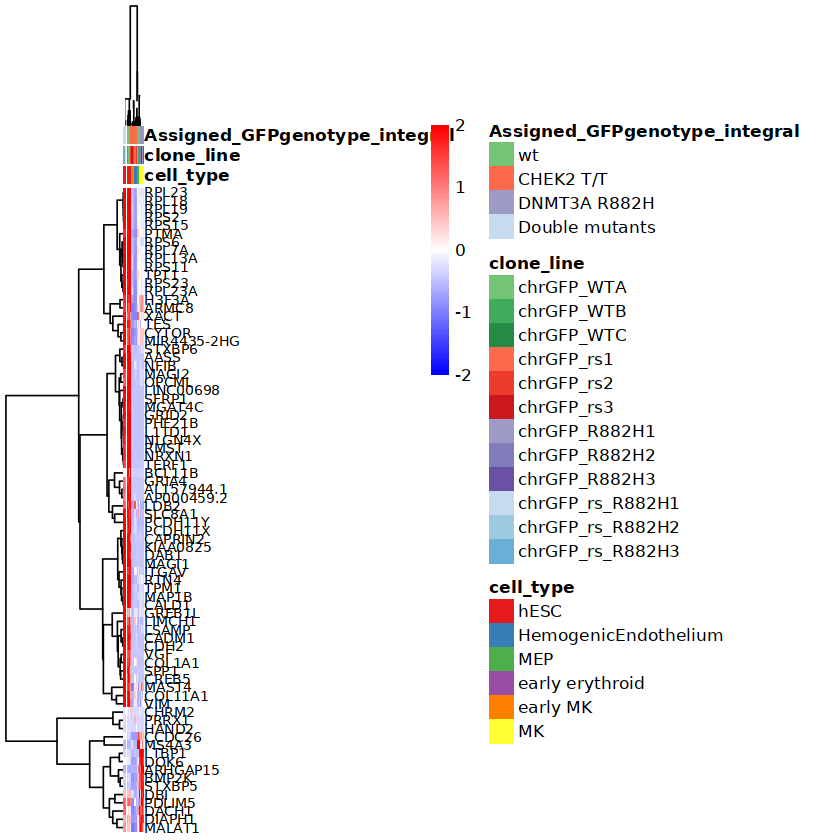

In [356]:
 heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [357]:
levels(annotation_col$clone_line)

[1] "chrGFP_WTA"       "chrGFP_WTB"       "chrGFP_WTC"       "chrGFP_rs1"      
 [5] "chrGFP_rs2"       "chrGFP_rs3"       "chrGFP_R882H1"    "chrGFP_R882H2"   
 [9] "chrGFP_R882H3"    "chrGFP_rs_R882H1" "chrGFP_rs_R882H2" "chrGFP_rs_R882H3"

In [358]:
names(ann_colors$clone_line)

[1] "chrGFP_WTA"       "chrGFP_WTB"       "chrGFP_WTC"       "chrGFP_rs1"      
 [5] "chrGFP_rs2"       "chrGFP_rs3"       "chrGFP_R882H1"    "chrGFP_R882H2"   
 [9] "chrGFP_R882H3"    "chrGFP_rs_R882H1" "chrGFP_rs_R882H2" "chrGFP_rs_R882H3"

In [359]:
names(ann_colors$clone_line) == levels(annotation_col$clone_line)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [360]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [361]:
#dir.create('graphs')

In [362]:
setwd("graphs/")

In [363]:
svgname<-paste(paste("Heatmap","start", sep='_'),".svg",sep='')

ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


In [364]:
str(SIG)

'data.frame':	780 obs. of  9 variables:
 $ gene          : chr  "PCDH11X" "DACH1" "SFRP1" "RPL19" ...
 $ baseMean      : num  3.14 292.78 22.73 202.96 48.37 ...
 $ log2FoldChange: num  -0.000602 -0.678629 -0.002084 1.504969 2.364305 ...
 $ lfcSE         : num  0.0126 0.1622 0.0128 0.2503 0.4309 ...
 $ pvalue        : num  1.60e-07 1.05e-06 4.69e-06 2.58e-10 8.60e-09 ...
 $ padj          : num  4.72e-03 1.55e-02 4.61e-02 5.70e-07 9.49e-06 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "early MK" ...
 $ Minuslogp     : num  2.33 1.81 1.34 6.24 5.02 ...


In [64]:
summary(droplevels(interaction(SIG$cell_type,SIG$contrast)))

early MK.Genotype_CHEK2.T.T_vs_wt 
                                               280 
     HemogenicEndothelium.Genotype_CHEK2.T.T_vs_wt 
                                                12 
                     hESC.Genotype_CHEK2.T.T_vs_wt 
                                                44 
                       MK.Genotype_CHEK2.T.T_vs_wt 
                                                 3 
                  hESC.Genotype_DNMT3A.R882H_vs_wt 
                                                 6 
                   MEP.Genotype_DNMT3A.R882H_vs_wt 
                                                 2 
HemogenicEndothelium.Genotype_Double.mutants_vs_wt 
                                                 1 
                hESC.Genotype_Double.mutants_vs_wt 
                                               431 
                 MEP.Genotype_Double.mutants_vs_wt 
                                                 1

In [65]:
genes_1<-unique(SIG$gene[which(SIG$contrast == "Genotype_CHEK2.T.T_vs_wt")])

In [66]:
names(summary(as.factor(SIG$contrast)))

[1] "Genotype_CHEK2.T.T_vs_wt"      "Genotype_DNMT3A.R882H_vs_wt"  
[3] "Genotype_Double.mutants_vs_wt"

In [67]:
genes_2<-unique(SIG$gene[which(SIG$contrast == "Genotype_Double.mutants_vs_wt")])

In [68]:
#str(genes_1)
#str(genes_2)

In [69]:
overlap<-which(genes_1%in%genes_2)

str(overlap)

 int [1:57] 2 3 10 22 23 28 31 63 65 76 ...


In [70]:
#genes_2

# Volcano plots per cell type

In [12]:
str(Global_results)

'data.frame':	658818 obs. of  8 variables:
 $ gene          : chr  "DACH1" "CYTIP" "TANC1" "ROBO1" ...
 $ baseMean      : num  292.8 29.9 92.8 97.7 111.2 ...
 $ log2FoldChange: num  -0.60416 -0.00375 -0.79762 -0.81306 -0.00554 ...
 $ lfcSE         : num  0.1771 0.0248 0.2968 0.2864 0.0253 ...
 $ pvalue        : num  2.25e-05 1.59e-04 1.79e-04 1.74e-04 8.20e-05 ...
 $ padj          : num  0.665 0.753 0.753 0.753 0.753 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "MK" ...


In [43]:
Global_results$Minuslogp<--1*log10(Global_results$padj)
Global_results$abslogfc<-abs(Global_results$log2FoldChange)

In [44]:
str(Global_results)

'data.frame':	658818 obs. of  10 variables:
 $ gene          : chr  "DACH1" "CYTIP" "TANC1" "ROBO1" ...
 $ baseMean      : num  292.8 29.9 92.8 97.7 111.2 ...
 $ log2FoldChange: num  -0.60416 -0.00375 -0.79762 -0.81306 -0.00554 ...
 $ lfcSE         : num  0.1771 0.0248 0.2968 0.2864 0.0253 ...
 $ pvalue        : num  2.25e-05 1.59e-04 1.79e-04 1.74e-04 8.20e-05 ...
 $ padj          : num  0.665 0.753 0.753 0.753 0.753 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "MK" "MK" "MK" "MK" ...
 $ Minuslogp     : num  0.177 0.123 0.123 0.123 0.123 ...
 $ abslogfc      : num  0.60416 0.00375 0.79762 0.81306 0.00554 ...


In [202]:
New_heatmap_genes<-c()

## Volcano 'HemogenicEndothelium' & Genotype_CHEK2.T.T_vs_wt

In [203]:
df<-Global_results[which(Global_results$cell_type == 'HemogenicEndothelium' & Global_results$contrast == 'Genotype_CHEK2.T.T_vs_wt'),]

In [204]:
str(df)
summary(df$abslogfc)

'data.frame':	36601 obs. of  10 variables:
 $ gene          : chr  "HAND2" "PRRX1" "DIAPH1" "LTBP1" ...
 $ baseMean      : num  15.5 36.5 40.7 70.9 15.9 ...
 $ log2FoldChange: num  -3.22 -2.60 1.81 2.03 -3.75e-06 ...
 $ lfcSE         : num  0.76284 0.70208 0.47953 0.55152 0.00144 ...
 $ pvalue        : num  1.66e-06 6.79e-06 6.03e-06 1.05e-05 1.84e-05 ...
 $ padj          : num  0.00808 0.01102 0.01102 0.01273 0.01797 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" ...
 $ Minuslogp     : num  2.09 1.96 1.96 1.9 1.75 ...
 $ abslogfc      : num  3.22 2.60 1.81 2.03 3.75e-06 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.002   0.000   3.222   13470 

In [205]:
df$highlighted<-NA

In [206]:
df$highlighted[which(df$Minuslogp >= 1.3 & df$abslogfc >= 0.5)]<-"highlight"

In [207]:
str(df)

summary(as.factor(df$highlighted))

'data.frame':	36601 obs. of  11 variables:
 $ gene          : chr  "HAND2" "PRRX1" "DIAPH1" "LTBP1" ...
 $ baseMean      : num  15.5 36.5 40.7 70.9 15.9 ...
 $ log2FoldChange: num  -3.22 -2.60 1.81 2.03 -3.75e-06 ...
 $ lfcSE         : num  0.76284 0.70208 0.47953 0.55152 0.00144 ...
 $ pvalue        : num  1.66e-06 6.79e-06 6.03e-06 1.05e-05 1.84e-05 ...
 $ padj          : num  0.00808 0.01102 0.01102 0.01273 0.01797 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" ...
 $ Minuslogp     : num  2.09 1.96 1.96 1.9 1.75 ...
 $ abslogfc      : num  3.22 2.60 1.81 2.03 3.75e-06 ...
 $ highlighted   : chr  "highlight" "highlight" "highlight" "highlight" ...


highlight      NA's 
       10     36591

In [208]:
sort(df$gene[!is.na(df$highlighted)])

[1] "ARMC8"   "BMP2K"   "CDH2"    "DIAPH1"  "DOK6"    "HAND2"   "LTBP1"  
 [8] "PCDH11Y" "PDLIM5"  "PRRX1"

In [209]:
selection_of_genes<-df$gene[!is.na(df$highlighted)]

In [210]:
New_heatmap_genes<-c(New_heatmap_genes,selection_of_genes)

str(New_heatmap_genes)

 chr [1:10] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "BMP2K" "PCDH11Y" "ARMC8" ...


Warning message:
"Removed 18260 rows containing missing values (`geom_point()`)."


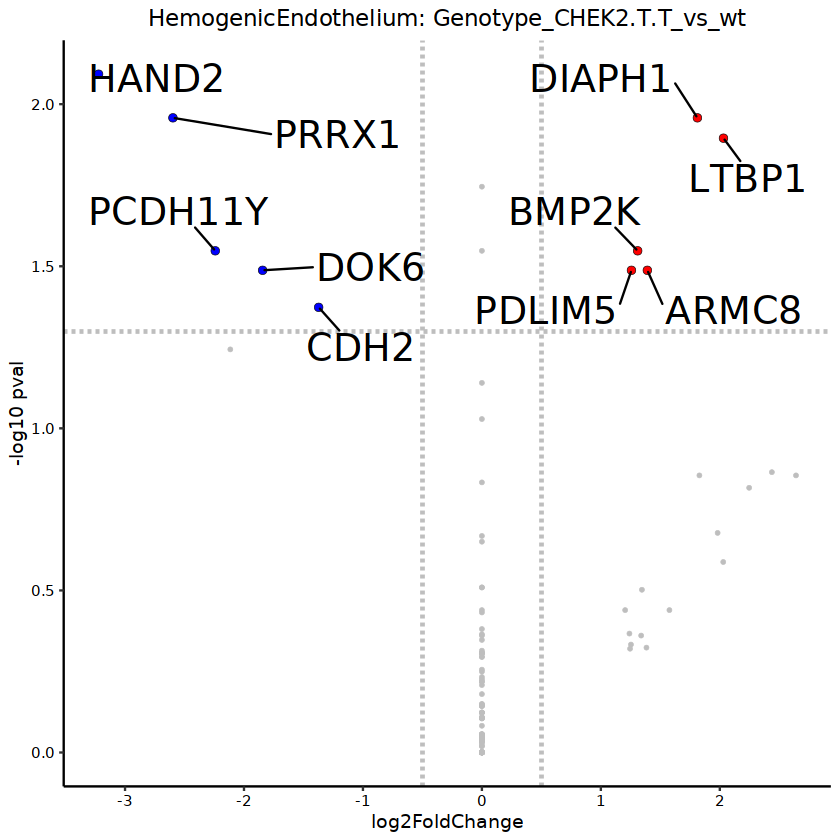

In [161]:
volcano_plot<-ggplot(data=df,
                       aes(x=log2FoldChange,
                           y=Minuslogp)) +
                geom_vline(xintercept=c(-0.5,0.5), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=df[which(df$Minuslogp < 1.3 | df$abslogfc < 0.5),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=1)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange <= -0.5),],
               color="black",fill="blue", stroke=0.2, shape=21, size=2)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange >= 0.5),],
               color="black",fill="red", stroke=0.2, shape=21, size=2)+
scale_y_continuous(name="-log10 pval")+
ggtitle(paste(unique(df$cell_type), unique(df$contrast), sep=": "))+
theme_classic()+
    theme(axis.title=element_text(color="black", family="sans"),
          axis.title.y=element_text(color="black", family="sans"),
          axis.title.x=element_text(color="black", family="sans"),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(color="black", family="sans"))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=df[which(df$gene%in%selection_of_genes),],
                     aes(x=log2FoldChange,
                         y=Minuslogp,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     segment.size  = 0.5,
                     segment.color = "black",
                     force=25,
                     size=8,
                     box.padding = 1,
                     max.overlaps = Inf)
volcano_plot

In [162]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [163]:
#dir.create('graphs')

In [164]:
setwd("graphs/")

In [165]:
svgname<-paste(paste("volcano_plot","HemogenicEndothelium_wt_CHECK2", sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg')


Saving 6.67 x 6.67 in image
Warning message:
"Removed 18260 rows containing missing values (`geom_point()`)."


## Volcano 'hESC' & Global_results$contrast == 'Genotype_DNMT3A.R882H_vs_wt'

In [211]:
df<-Global_results[which(Global_results$cell_type == 'hESC' & Global_results$contrast == 'Genotype_DNMT3A.R882H_vs_wt'),]

In [212]:
str(df)
summary(df$abslogfc)

'data.frame':	36601 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "AL157944.1" "NFIB" "SLC8A1" ...
 $ baseMean      : num  46.4 301.5 806.5 93.7 1472 ...
 $ log2FoldChange: num  -1.78 -0.545 0.344 -0.723 -0.319 ...
 $ lfcSE         : num  0.2488 0.1171 0.0819 0.1917 0.0842 ...
 $ pvalue        : num  3.25e-14 1.08e-07 1.05e-06 4.99e-06 4.65e-06 ...
 $ padj          : num  6.17e-10 1.02e-03 6.67e-03 1.89e-02 1.89e-02 ...
 $ contrast      : chr  "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  9.21 2.99 2.18 1.72 1.72 ...
 $ abslogfc      : num  1.78 0.545 0.344 0.723 0.319 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.001   0.000   2.027    5765 

In [213]:
df$highlighted<-NA

In [214]:
df$highlighted[which(df$Minuslogp >= 1.3 & df$abslogfc >= 0.5)]<-"highlight"

In [215]:
str(df)

summary(as.factor(df$highlighted))

'data.frame':	36601 obs. of  11 variables:
 $ gene          : chr  "BCL11B" "AL157944.1" "NFIB" "SLC8A1" ...
 $ baseMean      : num  46.4 301.5 806.5 93.7 1472 ...
 $ log2FoldChange: num  -1.78 -0.545 0.344 -0.723 -0.319 ...
 $ lfcSE         : num  0.2488 0.1171 0.0819 0.1917 0.0842 ...
 $ pvalue        : num  3.25e-14 1.08e-07 1.05e-06 4.99e-06 4.65e-06 ...
 $ padj          : num  6.17e-10 1.02e-03 6.67e-03 1.89e-02 1.89e-02 ...
 $ contrast      : chr  "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" "Genotype_DNMT3A.R882H_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  9.21 2.99 2.18 1.72 1.72 ...
 $ abslogfc      : num  1.78 0.545 0.344 0.723 0.319 ...
 $ highlighted   : chr  "highlight" "highlight" NA "highlight" ...


highlight      NA's 
        3     36598

In [216]:
sort(df$gene[!is.na(df$highlighted)])

[1] "AL157944.1" "BCL11B"     "SLC8A1"

In [217]:
selection_of_genes<-df$gene[!is.na(df$highlighted)]

In [218]:
New_heatmap_genes<-unique(c(New_heatmap_genes,selection_of_genes))

str(New_heatmap_genes)

 chr [1:13] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "BMP2K" "PCDH11Y" "ARMC8" ...


Warning message:
"Removed 11851 rows containing missing values (`geom_point()`)."


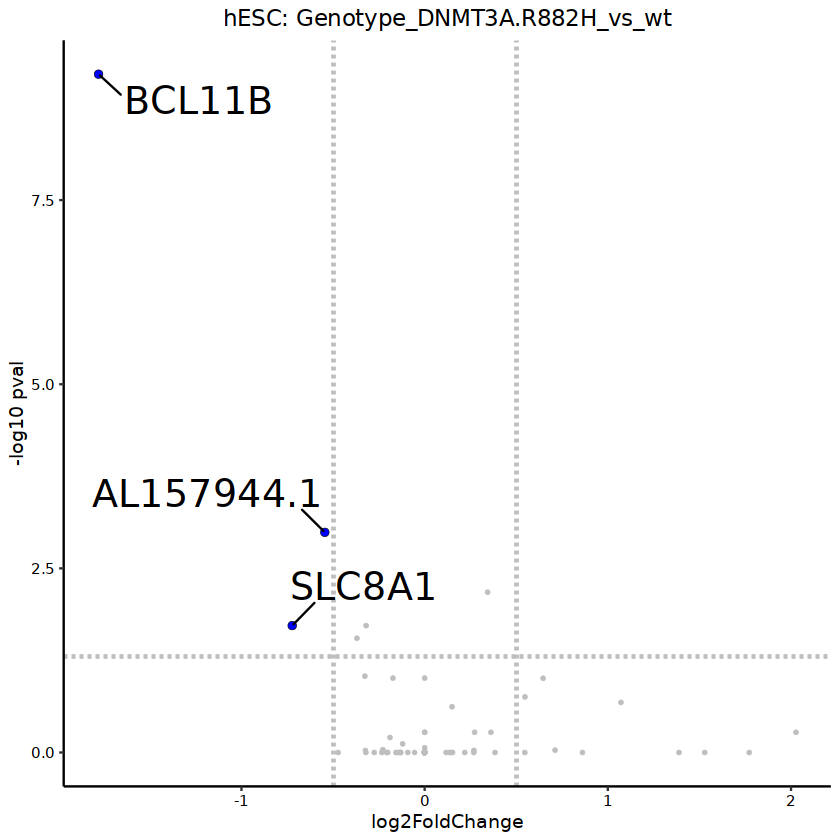

In [197]:
volcano_plot<-ggplot(data=df,
                       aes(x=log2FoldChange,
                           y=Minuslogp)) +
                geom_vline(xintercept=c(-0.5,0.5), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=df[which(df$Minuslogp < 1.3 | df$abslogfc < 0.5),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=1)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange <= -0.5),],
               color="black",fill="blue", stroke=0.2, shape=21, size=2)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange >= 0.5),],
               color="black",fill="red", stroke=0.2, shape=21, size=2)+
scale_y_continuous(name="-log10 pval")+
ggtitle(paste(unique(df$cell_type), unique(df$contrast), sep=": "))+
theme_classic()+
    theme(axis.title=element_text(color="black", family="sans"),
          axis.title.y=element_text(color="black", family="sans"),
          axis.title.x=element_text(color="black", family="sans"),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(color="black", family="sans"))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=df[which(df$gene%in%selection_of_genes),],
                     aes(x=log2FoldChange,
                         y=Minuslogp,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     segment.size  = 0.5,
                     segment.color = "black",
                     force=25,
                     size=8,
                     box.padding = 1,
                     max.overlaps = Inf)
volcano_plot

In [198]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [199]:
#dir.create('graphs')

In [200]:
setwd("graphs/")

In [201]:
svgname<-paste(paste("volcano_plot","hESC_wt_DNMT3A", sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg')


Saving 6.67 x 6.67 in image
Warning message:
"Removed 11851 rows containing missing values (`geom_point()`)."


## Volcano 'hESC' & Global_results$contrast == 'Genotype_Double.mutants_vs_wt'

In [219]:
df<-Global_results[which(Global_results$cell_type == 'hESC' & Global_results$contrast == 'Genotype_Double.mutants_vs_wt'),]

In [220]:
str(df)
summary(df$abslogfc)

'data.frame':	36601 obs. of  10 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "LIMCH1" ...
 $ baseMean      : num  46.4 3010.3 658.9 310.5 301.5 ...
 $ log2FoldChange: num  -2.848 0.509 0.787 1.097 -0.915 ...
 $ lfcSE         : num  0.2798 0.0558 0.0908 0.1299 0.1138 ...
 $ pvalue        : num  1.34e-25 4.42e-21 2.23e-19 1.92e-18 3.51e-17 ...
 $ padj          : num  1.59e-21 2.62e-17 8.82e-16 5.71e-15 8.35e-14 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  20.8 16.6 15.1 14.2 13.1 ...
 $ abslogfc      : num  2.848 0.509 0.787 1.097 0.915 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.001   0.004   0.024   0.017   3.541    5765 

In [221]:
df$highlighted<-NA

In [222]:
df$highlighted[which(df$Minuslogp >= 1.3 & df$abslogfc >= 0.5)]<-"highlight"

In [223]:
str(df)

summary(as.factor(df$highlighted))

'data.frame':	36601 obs. of  11 variables:
 $ gene          : chr  "BCL11B" "CALD1" "LSAMP" "LIMCH1" ...
 $ baseMean      : num  46.4 3010.3 658.9 310.5 301.5 ...
 $ log2FoldChange: num  -2.848 0.509 0.787 1.097 -0.915 ...
 $ lfcSE         : num  0.2798 0.0558 0.0908 0.1299 0.1138 ...
 $ pvalue        : num  1.34e-25 4.42e-21 2.23e-19 1.92e-18 3.51e-17 ...
 $ padj          : num  1.59e-21 2.62e-17 8.82e-16 5.71e-15 8.35e-14 ...
 $ contrast      : chr  "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" "Genotype_Double.mutants_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  20.8 16.6 15.1 14.2 13.1 ...
 $ abslogfc      : num  2.848 0.509 0.787 1.097 0.915 ...
 $ highlighted   : chr  "highlight" "highlight" "highlight" "highlight" ...


highlight      NA's 
      168     36433

In [224]:
sort(df$gene[!is.na(df$highlighted)])

[1] "AC007326.5"  "AC010168.1"  "AC010967.1"  "AC016766.1"  "AC084816.1" 
  [6] "AC091493.1"  "AC105450.1"  "AC112206.2"  "ADAMTS6"     "ADAMTS8"    
 [11] "ADM"         "AFF2"        "AHNAK"       "AL121885.2"  "AL157944.1" 
 [16] "AL357054.2"  "AL583808.1"  "ANGPT1"      "ANKRD33B"    "ANXA1"      
 [21] "ANXA2"       "ANXA3"       "AP000459.2"  "ARHGAP10"    "ARRDC3"     
 [26] "AXL"         "BCL11B"      "CADM1"       "CALD1"       "CAPN2"      
 [31] "CASC9"       "CAV1"        "CAVIN1"      "CAVIN3"      "CCDC141"    
 [36] "CCN1"        "CCN2"        "CDH13"       "CDH18"       "CDH2"       
 [41] "CDH6"        "CER1"        "CNTNAP2"     "COL12A1"     "COL1A1"     
 [46] "COL7A1"      "CREB5"       "CUZD1"       "CXCL14"      "CYP26A1"    
 [51] "DACH1"       "DDR2"        "DGKB"        "DNAH5"       "DNAJC6"     
 [56] "DSP"         "EMP3"        "ENC1"        "ERG"         "FAM20A"     
 [61] "FAT4"        "FBN2"        "FEZ1"        "FHIT"        "FLNC"       
 [66] "FST"         "GABRA3"      "GFRA1"       "GLB1L3"      "GLIS3"      
 [71] "GNA14"       "GREB1L"      "GRIA3"       "GRIA4"       "GRIK2"      
 [76] "GUCY2C"      "HDAC9"       "HEY2"        "HIST1H2AC"   "HIST1H2AH"  
 [81] "HIST1H2BN"   "HIST1H4H"    "HTR2C"       "IDO1"        "IGFBP6"     
 [86] "IQCJ-SCHIP1" "IQSEC2"      "ITGA3"       "ITGAV"       "KCNB2"      
 [91] "KCNJ6"       "KCNQ3"       "KCNQ5"       "KIAA1217"    "KLF7"       
 [96] "KMT5A"       "L3MBTL4"     "LAMA5"       "LAMB1"       "LAMC2"      
[101] "LEPR"        "LEPROT"      "LIMCH1"      "LINC01482"   "LINC01829"  
[106] "LMCD1-AS1"   "LMNA"        "LMO3"        "LSAMP"       "MARCH1"     
[111] "MCAM"        "MCTP1"       "MIAT"        "MIR4435-2HG" "MIR503HG"   
[116] "MYO1C"       "MYOF"        "NR5A2"       "NRCAM"       "NRG1"       
[121] "NXPH1"       "OPCML"       "OTX2"        "PALLD"       "PAPPA"      
[126] "PDGFB"       "PDZD4"       "PEA15"       "PIEZO2"      "PIK3R3"     
[131] "PLIN2"       "PLK2"        "PLXNB2"      "PRSS23"      "PRTG"       
[136] "PTCH1"       "PXDNL"       "RALYL"       "RMST"        "RYR1"       
[141] "SAMD4A"      "SCRN1"       "SDK2"        "SEMA3F"      "SERPINE1"   
[146] "SHC3"        "SHROOM3"     "SLFN12"      "SLIT2"       "SORCS3"     
[151] "SPP1"        "STXBP6"      "SULF2"       "SYT2"        "TAC1"       
[156] "TAGLN2"      "THRB"        "TNFRSF12A"   "TRHDE"       "TSPAN18"    
[161] "TUB"         "TXNRD2"      "UPP1"        "USP53"       "VEGFA"      
[166] "VGF"         "VGLL3"       "WEE1"

In [225]:
selection_of_genes<-c('BCL11B','KLF7','PDGFB','VGF','ITGA3','MCAM','SPP1','COL1A1','CREB5','STXBP6','GRIA4')

In [226]:
New_heatmap_genes<-unique(c(New_heatmap_genes,selection_of_genes))

str(New_heatmap_genes)

 chr [1:23] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "BMP2K" "PCDH11Y" "ARMC8" ...


Warning message:
"Removed 18920 rows containing missing values (`geom_point()`)."


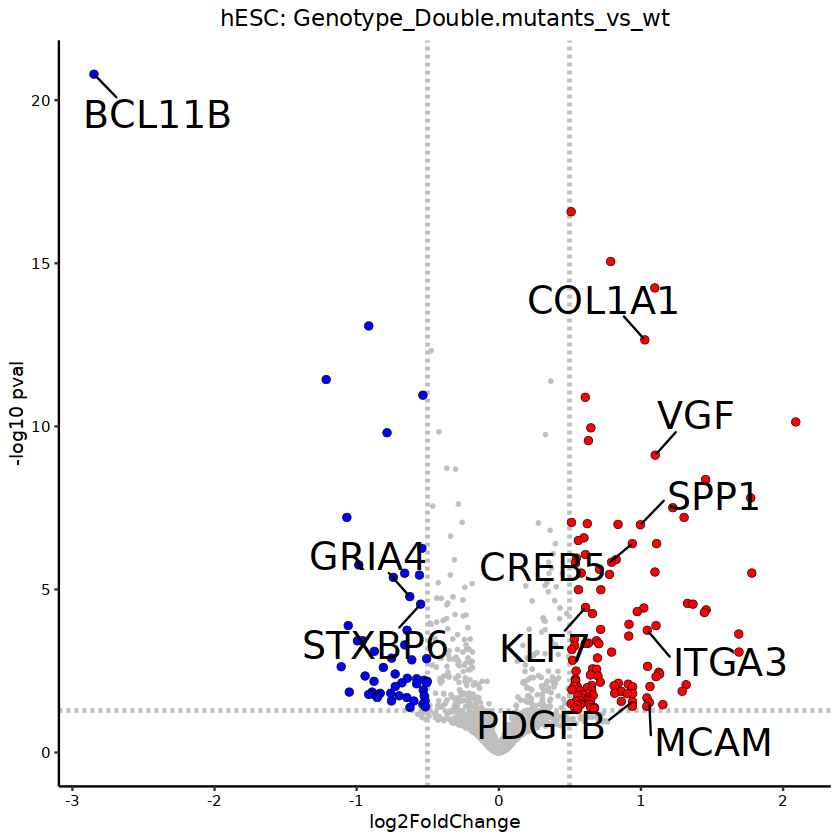

In [185]:
volcano_plot<-ggplot(data=df,
                       aes(x=log2FoldChange,
                           y=Minuslogp)) +
                geom_vline(xintercept=c(-0.5,0.5), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=df[which(df$Minuslogp < 1.3 | df$abslogfc < 0.5),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=1)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange <= -0.5),],
               color="black",fill="blue", stroke=0.2, shape=21, size=2)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange >= 0.5),],
               color="black",fill="red", stroke=0.2, shape=21, size=2)+
scale_y_continuous(name="-log10 pval")+
ggtitle(paste(unique(df$cell_type), unique(df$contrast), sep=": "))+
theme_classic()+
    theme(axis.title=element_text(color="black", family="sans"),
          axis.title.y=element_text(color="black", family="sans"),
          axis.title.x=element_text(color="black", family="sans"),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(color="black", family="sans"))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=df[which(df$gene%in%selection_of_genes),],
                     aes(x=log2FoldChange,
                         y=Minuslogp,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     segment.size  = 0.5,
                     segment.color = "black",
                     force=25,
                     size=8,
                     box.padding = 1,
                     max.overlaps = Inf)
volcano_plot

In [186]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [187]:
#dir.create('graphs')

In [188]:
setwd("graphs/")

In [189]:
svgname<-paste(paste("volcano_plot","hESC_wt_Double_mutants", sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg')


Saving 6.67 x 6.67 in image
Warning message:
"Removed 18920 rows containing missing values (`geom_point()`)."


## Volcano 'hESC' & Global_results$contrast == 'Genotype_CHEK2.T.T_vs_wt'

In [227]:
df<-Global_results[which(Global_results$cell_type == 'hESC' & Global_results$contrast == 'Genotype_CHEK2.T.T_vs_wt'),]

In [228]:
str(df)
summary(df$abslogfc)

'data.frame':	36601 obs. of  10 variables:
 $ gene          : chr  "GRIA4" "SPP1" "KIAA0825" "MALAT1" ...
 $ baseMean      : num  546 248 7483 18630 1797 ...
 $ log2FoldChange: num  0.728 -1.066 -0.289 -0.236 -0.338 ...
 $ lfcSE         : num  0.1336 0.2067 0.0578 0.0489 0.0747 ...
 $ pvalue        : num  2.18e-09 1.07e-08 3.47e-08 6.87e-08 2.46e-07 ...
 $ padj          : num  9.13e-06 2.25e-05 4.86e-05 7.21e-05 2.07e-04 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  5.04 4.65 4.31 4.14 3.68 ...
 $ abslogfc      : num  0.728 1.066 0.289 0.236 0.338 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.001   0.004   0.003   1.653    5765 

In [229]:
df$highlighted<-NA

In [230]:
df$highlighted[which(df$Minuslogp >= 1.3 & df$abslogfc >= 0.5)]<-"highlight"

In [231]:
str(df)

summary(as.factor(df$highlighted))

'data.frame':	36601 obs. of  11 variables:
 $ gene          : chr  "GRIA4" "SPP1" "KIAA0825" "MALAT1" ...
 $ baseMean      : num  546 248 7483 18630 1797 ...
 $ log2FoldChange: num  0.728 -1.066 -0.289 -0.236 -0.338 ...
 $ lfcSE         : num  0.1336 0.2067 0.0578 0.0489 0.0747 ...
 $ pvalue        : num  2.18e-09 1.07e-08 3.47e-08 6.87e-08 2.46e-07 ...
 $ padj          : num  9.13e-06 2.25e-05 4.86e-05 7.21e-05 2.07e-04 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ Minuslogp     : num  5.04 4.65 4.31 4.14 3.68 ...
 $ abslogfc      : num  0.728 1.066 0.289 0.236 0.338 ...
 $ highlighted   : chr  "highlight" "highlight" NA NA ...


highlight      NA's 
        8     36593

In [232]:
sort(df$gene[!is.na(df$highlighted)])

[1] "CAPRIN2" "COL11A1" "COL1A1"  "CREB5"   "GRIA4"   "SPP1"    "STXBP6" 
[8] "TES"

In [233]:
selection_of_genes<-df$gene[!is.na(df$highlighted)]

In [234]:
New_heatmap_genes<-unique(c(New_heatmap_genes,selection_of_genes))

str(New_heatmap_genes)

 chr [1:26] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "BMP2K" "PCDH11Y" "ARMC8" ...


Warning message:
"Removed 26628 rows containing missing values (`geom_point()`)."


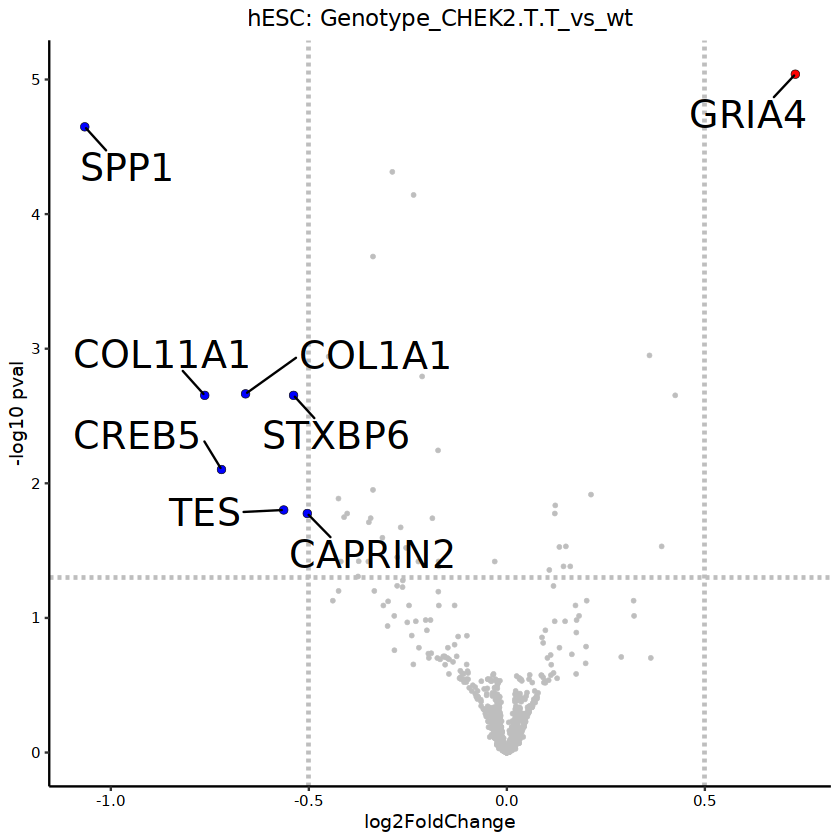

In [149]:
volcano_plot<-ggplot(data=df,
                       aes(x=log2FoldChange,
                           y=Minuslogp)) +
                geom_vline(xintercept=c(-0.5,0.5), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=df[which(df$Minuslogp < 1.3 | df$abslogfc < 0.5),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=1)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange <= -0.5),],
               color="black",fill="blue", stroke=0.2, shape=21, size=2)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange >= 0.5),],
               color="black",fill="red", stroke=0.2, shape=21, size=2)+
scale_y_continuous(name="-log10 pval")+
ggtitle(paste(unique(df$cell_type), unique(df$contrast), sep=": "))+
theme_classic()+
    theme(axis.title=element_text(color="black", family="sans"),
          axis.title.y=element_text(color="black", family="sans"),
          axis.title.x=element_text(color="black", family="sans"),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(color="black", family="sans"))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=df[which(df$gene%in%selection_of_genes),],
                     aes(x=log2FoldChange,
                         y=Minuslogp,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     segment.size  = 0.5,
                     segment.color = "black",
                     force=25,
                     size=8,
                     box.padding = 1,
                     max.overlaps = Inf)
volcano_plot

In [150]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [151]:
#dir.create('graphs')

In [152]:
setwd("graphs/")

In [153]:
svgname<-paste(paste("volcano_plot","hESC_wt_CHEK2", sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg')


Saving 6.67 x 6.67 in image
Warning message:
"Removed 26628 rows containing missing values (`geom_point()`)."


## Volcano 'early MK' & Global_results$contrast == 'Genotype_CHEK2.T.T_vs_wt'

In [235]:
df<-Global_results[which(Global_results$cell_type == 'early MK' & Global_results$contrast == 'Genotype_CHEK2.T.T_vs_wt'),]

In [236]:
str(df)
summary(df$abslogfc)

'data.frame':	36601 obs. of  10 variables:
 $ gene          : chr  "RPL19" "DBI" "TPT1" "TPM1" ...
 $ baseMean      : num  203 48.4 101.3 48.8 104.5 ...
 $ log2FoldChange: num  1.5 2.36 1.72 -1.71 1.85 ...
 $ lfcSE         : num  0.25 0.431 0.34 0.358 0.37 ...
 $ pvalue        : num  2.58e-10 8.60e-09 5.29e-08 7.17e-08 8.86e-08 ...
 $ padj          : num  5.70e-07 9.49e-06 3.89e-05 3.91e-05 3.91e-05 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "early MK" "early MK" "early MK" "early MK" ...
 $ Minuslogp     : num  6.24 5.02 4.41 4.41 4.41 ...
 $ abslogfc      : num  1.5 2.36 1.72 1.71 1.85 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.006   0.021   0.104   0.085   6.118   16046 

In [237]:
df$highlighted<-NA

In [238]:
df$highlighted[which(df$Minuslogp >= 1.3 & df$abslogfc >= 1)]<-"highlight"

In [239]:
str(df)

summary(as.factor(df$highlighted))

'data.frame':	36601 obs. of  11 variables:
 $ gene          : chr  "RPL19" "DBI" "TPT1" "TPM1" ...
 $ baseMean      : num  203 48.4 101.3 48.8 104.5 ...
 $ log2FoldChange: num  1.5 2.36 1.72 -1.71 1.85 ...
 $ lfcSE         : num  0.25 0.431 0.34 0.358 0.37 ...
 $ pvalue        : num  2.58e-10 8.60e-09 5.29e-08 7.17e-08 8.86e-08 ...
 $ padj          : num  5.70e-07 9.49e-06 3.89e-05 3.91e-05 3.91e-05 ...
 $ contrast      : chr  "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" "Genotype_CHEK2.T.T_vs_wt" ...
 $ cell_type     : chr  "early MK" "early MK" "early MK" "early MK" ...
 $ Minuslogp     : num  6.24 5.02 4.41 4.41 4.41 ...
 $ abslogfc      : num  1.5 2.36 1.72 1.71 1.85 ...
 $ highlighted   : chr  "highlight" "highlight" "highlight" "highlight" ...


highlight      NA's 
      227     36374

In [240]:
sort(df$gene[!is.na(df$highlighted)])

[1] "AASS"       "ABCC4"      "ACTB"       "ACTR3"      "ADGRV1"    
  [6] "AL627171.2" "ANP32B"     "APBB2"      "ARPC3"      "ARPC5"     
 [11] "ASPM"       "ATP5F1D"    "ATP5IF1"    "ATP5MC2"    "ATP5MC3"   
 [16] "AUTS2"      "BLVRB"      "BMP2K"      "BTF3"       "CALM3"     
 [21] "CAPG"       "CASC15"     "CCNB1"      "CD164"      "CD24"      
 [26] "CD63"       "CECR2"      "CELF2"      "CENPE"      "CHCHD2"    
 [31] "CKAP4"      "CLIC4"      "COX4I1"     "COX6B1"     "COX7A2"    
 [36] "COX7B"      "COX8A"      "CST3"       "DAD1"       "DBI"       
 [41] "DIAPH1"     "DLGAP1"     "DPPA4"      "DSG2"       "DUT"       
 [46] "EDF1"       "EEF1A1"     "EEF1B2"     "EIF1"       "ELF1"      
 [51] "EMP3"       "ENAH"       "EZR"        "FAU"        "FCER1G"    
 [56] "FDPS"       "FERMT2"     "FGD4"       "FGF2"       "FGFR1"     
 [61] "FOXO1"      "FRAS1"      "FZD7"       "GABARAP"    "GADD45GIP1"
 [66] "GNG5"       "GPM6B"      "GRID2"      "GSTO1"      "H3F3A"     
 [71] "HIF1A"      "HINT1"      "HMGB2"      "HMGN1"      "HMMR"      
 [76] "HNRNPLL"    "HSPE1"      "ID2"        "IQGAP2"     "ITM2B"     
 [81] "KAT6B"      "LARGE1"     "LDHA"       "LIN28A"     "LINC01004" 
 [86] "LRIG1"      "LTBP1"      "MALAT1"     "MARCKSL1"   "MBNL1"     
 [91] "MFGE8"      "MYL12B"     "MYO10"      "MZT2B"      "NAA38"     
 [96] "NACA"       "NDUFA4"     "NDUFB4"     "NDUFB7"     "NDUFB9"    
[101] "NEAT1"      "NFE2L3"     "NPTN"       "NR6A1"      "OAZ1"      
[106] "PARD3"      "PCLAF"      "PHF21B"     "PHGDH"      "PLCG2"     
[111] "POLR3G"     "PPIA"       "PPIB"       "PPP2CB"     "PRKAR2B"   
[116] "PSAT1"      "PTEN"       "PTMA"       "PTPN13"     "PTPRG"     
[121] "RAP1B"      "RARRES2"    "RBFOX1"     "RNASEK"     "RPL10"     
[126] "RPL13"      "RPL13A"     "RPL17"      "RPL18"      "RPL18A"    
[131] "RPL19"      "RPL21"      "RPL22"      "RPL23"      "RPL23A"    
[136] "RPL24"      "RPL27"      "RPL27A"     "RPL28"      "RPL31"     
[141] "RPL32"      "RPL35"      "RPL36"      "RPL36A"     "RPL36AL"   
[146] "RPL37A"     "RPL38"      "RPL39"      "RPL41"      "RPL5"      
[151] "RPL7"       "RPL7A"      "RPL9"       "RPLP0"      "RPLP2"     
[156] "RPS10"      "RPS11"      "RPS12"      "RPS13"      "RPS14"     
[161] "RPS15"      "RPS15A"     "RPS17"      "RPS18"      "RPS2"      
[166] "RPS21"      "RPS23"      "RPS24"      "RPS25"      "RPS27"     
[171] "RPS29"      "RPS3"       "RPS3A"      "RPS4X"      "RPS4Y1"    
[176] "RPS6"       "RPS8"       "SDC2"       "SEMA6A"     "SERF2"     
[181] "SERPINB1"   "SLC25A5"    "SLC25A6"    "SLC7A11"    "SMARCA1"   
[186] "SMYD3"      "SNRPE"      "SNRPG"      "SPCS3"      "SSR4"      
[191] "STRBP"      "STXBP5"     "SUB1"       "TAGLN2"     "TALDO1"    
[196] "TBC1D16"    "TCF7L1"     "TDGF1"      "TDRP"       "THBS1"     
[201] "TLN1"       "TMPO"       "TMSB4X"     "TOB2"       "TOMM6"     
[206] "TPM1"       "TPT1"       "TRIM71"     "TRPM3"      "TUBA1B"    
[211] "TUBA1C"     "TUBB2B"     "TUBB3"      "UBB"        "UBE2C"     
[216] "UBXN2A"     "UCHL1"      "UNC5D"      "UQCR10"     "UQCRB"     
[221] "UQCRH"      "USP12"      "VAMP8"      "VCAN"       "XACT"      
[226] "ZFP42"      "ZNF281"

In [241]:
selection_of_genes<-c('FOXO1','TMPO','CENPE','CCNB1','CD164','CD24','TUBB2B','TUBB3')

In [242]:
New_heatmap_genes<-unique(c(New_heatmap_genes,selection_of_genes))

str(New_heatmap_genes)

 chr [1:34] "HAND2" "PRRX1" "DIAPH1" "LTBP1" "BMP2K" "PCDH11Y" "ARMC8" ...


Warning message:
"Removed 18217 rows containing missing values (`geom_point()`)."


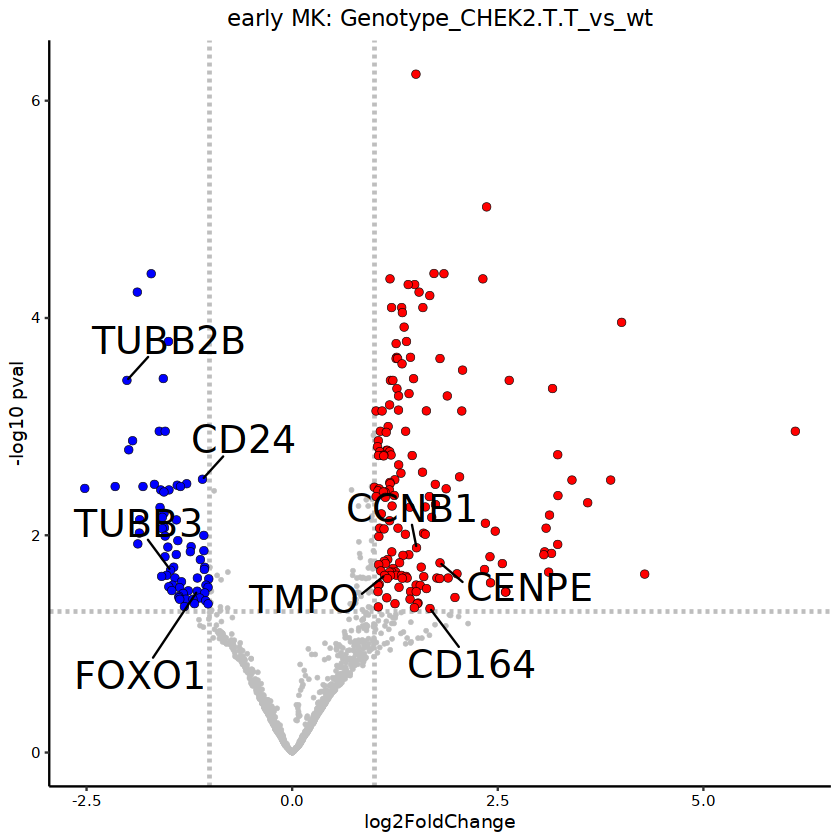

In [137]:
volcano_plot<-ggplot(data=df,
                       aes(x=log2FoldChange,
                           y=Minuslogp)) +
                geom_vline(xintercept=c(-1,1), color="gray", linetype='dashed',linewidth=1)+
                geom_hline(yintercept=c(1.3), color="gray", linetype='dashed',linewidth=1)+
 geom_point(data=df[which(df$Minuslogp < 1.3 | df$abslogfc < 1),],
               color="gray",fill="gray", stroke=0.2, shape=21, size=1)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange <= -1),],
               color="black",fill="blue", stroke=0.2, shape=21, size=2)+
geom_point(data=df[which(df$Minuslogp >= 1.3 & df$log2FoldChange >= 1),],
               color="black",fill="red", stroke=0.2, shape=21, size=2)+
scale_y_continuous(name="-log10 pval")+
ggtitle(paste(unique(df$cell_type), unique(df$contrast), sep=": "))+
theme_classic()+
    theme(axis.title=element_text(color="black", family="sans"),
          axis.title.y=element_text(color="black", family="sans"),
          axis.title.x=element_text(color="black", family="sans"),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(color="black", family="sans"))+
    theme(legend.title = element_text(family="sans"),
          legend.text = element_text(family="sans"),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="hidden")+
    ggeasy::easy_center_title()

volcano_plot <-volcano_plot+
    geom_text_repel(data=df[which(df$gene%in%selection_of_genes),],
                     aes(x=log2FoldChange,
                         y=Minuslogp,
                         label=gene),
                     family="sans",
                     fontface='italic',
                     segment.size  = 0.5,
                     segment.color = "black",
                     force=25,
                     size=8,
                     box.padding = 1,
                     max.overlaps = Inf)
volcano_plot

In [138]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [139]:
#dir.create('graphs')

In [140]:
setwd("graphs/")

In [141]:
svgname<-paste(paste("volcano_plot","earlyMK_wt_CHEK2", sep='_'),".svg",sep='')

ggsave(svgname,plot=volcano_plot, device ='svg')


Saving 6.67 x 6.67 in image
Warning message:
"Removed 18217 rows containing missing values (`geom_point()`)."


# New Heatmap

In [268]:
REP<-Global_normalized[which(Global_normalized$Symbol%in%New_heatmap_genes),]

str(REP)

'data.frame':	2414 obs. of  4 variables:
 $ Symbol        : chr  "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
 $ count         : num  0 10.49 0 2649.49 2.33 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


In [269]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=Symbol, 
                                    names_from=c("current_anot","GFPbc_integral"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

In [270]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide) == 'Symbol')])

row.names(GeneEXP_matrix)<-REP_wide$Symbol

str(GeneEXP_matrix)

 num [1:34, 1:71] 0 10.49 0 2649.49 2.33 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:34] "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
  ..$ : chr [1:71] "MK|chrGFP_R882H1" "MK|chrGFP_R882H2" "MK|chrGFP_R882H3" "MK|chrGFP_rs_R882H1" ...


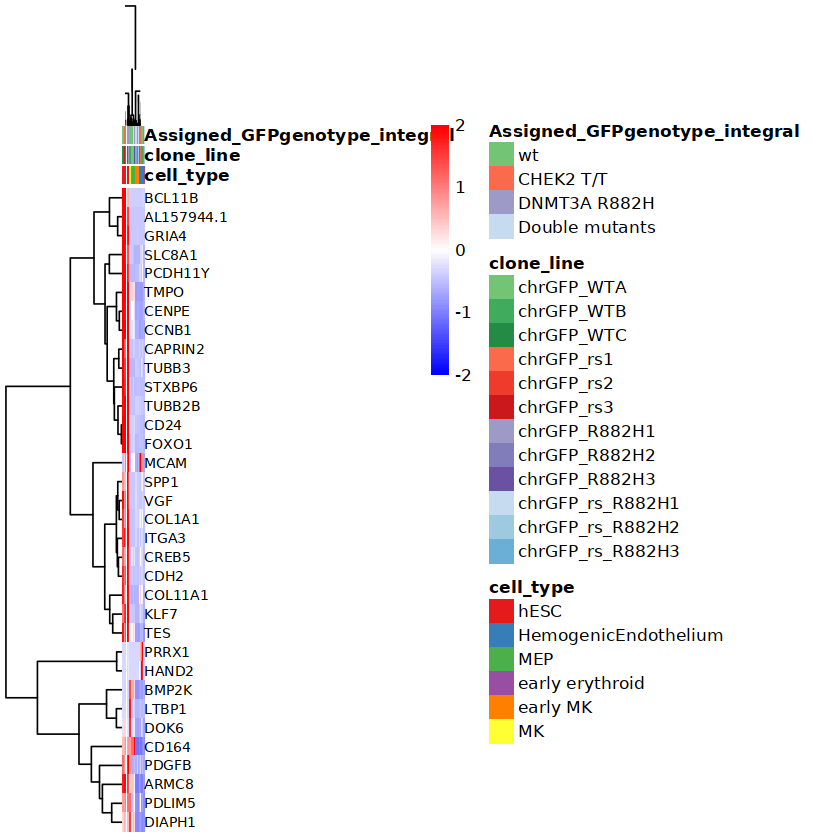

In [271]:
 heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [272]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [273]:
#dir.create('graphs')

In [274]:
setwd("graphs/")

In [275]:
svgname<-paste(paste("Heatmap","start",'2', sep='_'),".svg",sep='')

ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


## Do the Heatmap by CellType

### hESC

In [277]:
str(Global_normalized)

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


In [278]:
REP<-Global_normalized[which(Global_normalized$Symbol%in%New_heatmap_genes & Global_normalized$current_anot == 'hESC'),]

str(REP)

'data.frame':	408 obs. of  4 variables:
 $ Symbol        : chr  "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
 $ count         : num  231.37 242.77 1.63 276.17 70.06 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "hESC" "hESC" "hESC" "hESC" ...


In [279]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=Symbol, 
                                    names_from=c("current_anot","GFPbc_integral"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

In [280]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide) == 'Symbol')])

row.names(GeneEXP_matrix)<-REP_wide$Symbol

str(GeneEXP_matrix)

 num [1:34, 1:12] 231.37 242.77 1.63 276.17 70.06 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:34] "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
  ..$ : chr [1:12] "hESC|chrGFP_R882H1" "hESC|chrGFP_R882H2" "hESC|chrGFP_R882H3" "hESC|chrGFP_rs_R882H1" ...


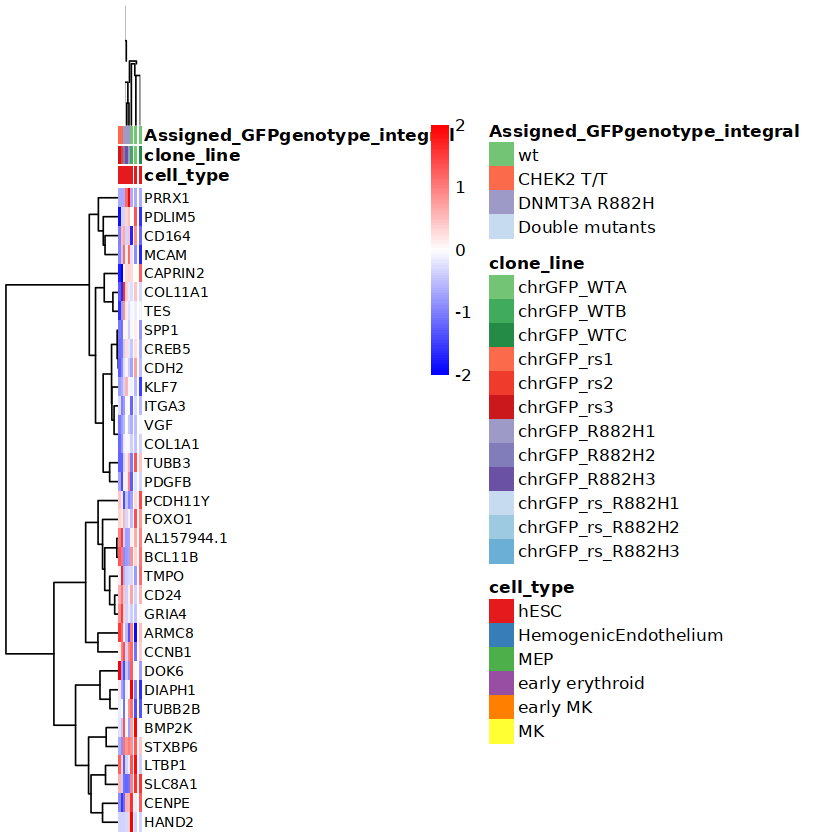

In [281]:
 heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [282]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [283]:
#dir.create('graphs')

In [284]:
setwd("graphs/")

In [285]:
svgname<-paste(paste("Heatmap","start",'2','hESCs', sep='_'),".svg",sep='')

ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


### early MK

In [331]:
str(Global_normalized)

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


In [333]:
REP<-Global_normalized[which(Global_normalized$Symbol%in%New_heatmap_genes & Global_normalized$current_anot == 'early MK'),]

str(REP)

'data.frame':	408 obs. of  4 variables:
 $ Symbol        : chr  "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
 $ count         : num  3.3 4.24 0 3.77 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "early MK" "early MK" "early MK" "early MK" ...


In [334]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=Symbol, 
                                    names_from=c("current_anot","GFPbc_integral"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

unique(REP_wide$Symbol)

[1] "AL157944.1" "COL11A1"    "PRRX1"      "LTBP1"      "SLC8A1"    
 [6] "KLF7"       "ARMC8"      "BMP2K"      "SPP1"       "PDLIM5"    
[11] "CENPE"      "HAND2"      "CCNB1"      "DIAPH1"     "TUBB2B"    
[16] "CD24"       "CD164"      "CREB5"      "VGF"        "TES"       
[21] "GRIA4"      "MCAM"       "CAPRIN2"    "TMPO"       "FOXO1"     
[26] "STXBP6"     "BCL11B"     "TUBB3"      "ITGA3"      "COL1A1"    
[31] "CDH2"       "DOK6"       "PDGFB"      "PCDH11Y"

In [335]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide) == 'Symbol')])

row.names(GeneEXP_matrix)<-REP_wide$Symbol

str(GeneEXP_matrix)

 num [1:34, 1:12] 3.3 4.24 0 3.77 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:34] "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
  ..$ : chr [1:12] "early MK|chrGFP_R882H1" "early MK|chrGFP_R882H2" "early MK|chrGFP_R882H3" "early MK|chrGFP_rs_R882H1" ...


In [336]:
GeneEXP_matrix[which(row.names(GeneEXP_matrix) == 'CD164'),]

early MK|chrGFP_R882H1    early MK|chrGFP_R882H2    early MK|chrGFP_R882H3 
                 6.603246                  6.240231                  7.783613 
early MK|chrGFP_rs_R882H1 early MK|chrGFP_rs_R882H2 early MK|chrGFP_rs_R882H3 
                14.892726                  8.122552                  8.920648 
      early MK|chrGFP_rs1       early MK|chrGFP_rs2       early MK|chrGFP_rs3 
                18.543798                  9.982497                 29.684271 
      early MK|chrGFP_WTA       early MK|chrGFP_WTB       early MK|chrGFP_WTC 
                 0.000000                  0.000000                  7.353996

In [343]:
vector_rowsums<-rowSums(GeneEXP_matrix)

indx.all.zero<-vector_rowsums[(vector_rowsums == 0)]

str(indx.all.zero)

zero_count_genes<-names(indx.all.zero)

zero_count_genes

 Named num [1:2] 0 0
 - attr(*, "names")= chr [1:2] "PRRX1" "HAND2"


[1] "PRRX1" "HAND2"

In [344]:
GeneEXP_matrix<-GeneEXP_matrix[-which(row.names(GeneEXP_matrix)%in%zero_count_genes),]

In [345]:
dim(GeneEXP_matrix)

[1] 32 12

In [346]:
head(GeneEXP_matrix)

,early MK|chrGFP_R882H1,early MK|chrGFP_R882H2,early MK|chrGFP_R882H3,early MK|chrGFP_rs_R882H1,early MK|chrGFP_rs_R882H2,early MK|chrGFP_rs_R882H3,early MK|chrGFP_rs1,early MK|chrGFP_rs2,early MK|chrGFP_rs3,early MK|chrGFP_WTA,early MK|chrGFP_WTB,early MK|chrGFP_WTC
AL157944.1,3.301623,2.080077,2.0130034,0.7446363,0.6768794,2.4779578,0.000000,1.109166,0.5976699,0.00000,0,0.000000
COL11A1,4.244944,2.080077,2.9524049,2.9785451,1.3537587,1.4867747,0.000000,1.109166,1.5937864,0.00000,0,0.000000
LTBP1,3.773284,0.000000,1.2078020,2.9785451,0.6768794,0.9911831,3.371600,19.964993,41.8368926,0.00000,0,0.000000
SLC8A1,0.000000,0.000000,0.1342002,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.00000,0,0.000000
KLF7,1.886642,4.160154,3.0866051,5.2124539,4.7381556,2.9735494,0.000000,1.109166,0.9961165,0.00000,0,0.000000
ARMC8,4.244944,4.160154,4.6970078,6.7017265,5.4150350,6.4426904,8.428999,16.637494,10.5588348,13.35896,0,5.515497


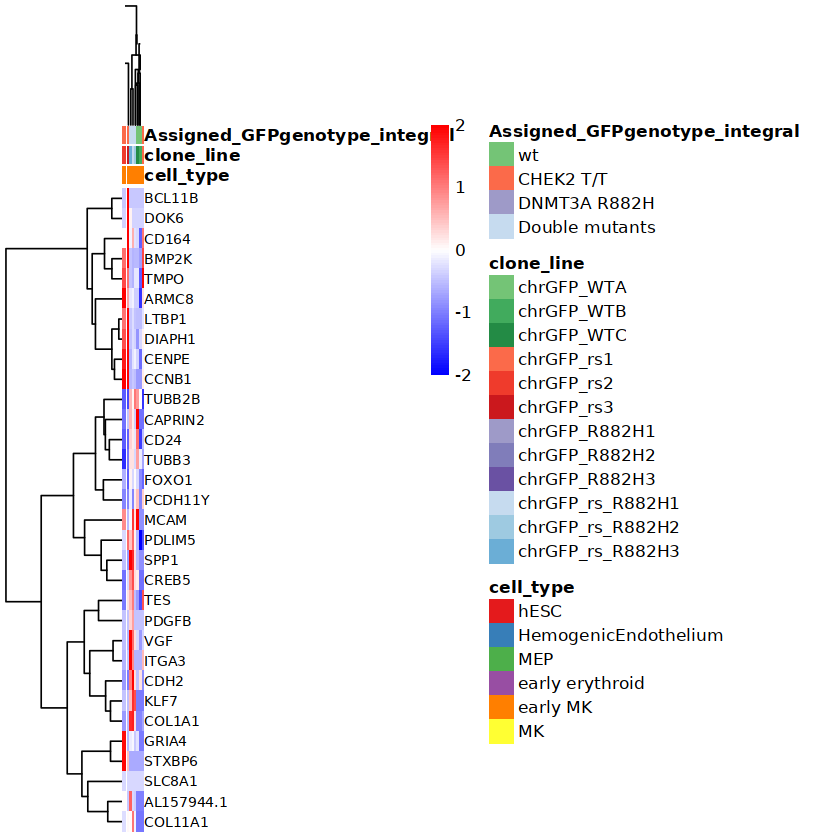

In [347]:
 heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "45",                    
                    fontsize_row = 8, 
                    fontsize_col = 8,
                   clustering_method="ward.D2",
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,                  
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [348]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [349]:
#dir.create('graphs')

In [350]:
setwd("graphs/")

In [351]:
svgname<-paste(paste("Heatmap","start",'2','early_MKs', sep='_'),".svg",sep='')

ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


### HemogenicEndothelium

In [362]:
str(Global_normalized)

'data.frame':	2598671 obs. of  4 variables:
 $ Symbol        : chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ count         : num  0 0 0 3.5 0 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "MK" "MK" "MK" "MK" ...


In [363]:
REP<-Global_normalized[which(Global_normalized$Symbol%in%New_heatmap_genes & Global_normalized$current_anot == 'HemogenicEndothelium'),]

str(REP)

'data.frame':	408 obs. of  4 variables:
 $ Symbol        : chr  "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
 $ count         : num  0 55.9 28.1 33.4 23 ...
 $ GFPbc_integral: chr  "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" "chrGFP_R882H1" ...
 $ current_anot  : chr  "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" "HemogenicEndothelium" ...


In [364]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=Symbol, 
                                    names_from=c("current_anot","GFPbc_integral"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

unique(REP_wide$Symbol)

[1] "AL157944.1" "COL11A1"    "PRRX1"      "LTBP1"      "SLC8A1"    
 [6] "KLF7"       "ARMC8"      "BMP2K"      "SPP1"       "PDLIM5"    
[11] "CENPE"      "HAND2"      "CCNB1"      "DIAPH1"     "TUBB2B"    
[16] "CD24"       "CD164"      "CREB5"      "VGF"        "TES"       
[21] "GRIA4"      "MCAM"       "CAPRIN2"    "TMPO"       "FOXO1"     
[26] "STXBP6"     "BCL11B"     "TUBB3"      "ITGA3"      "COL1A1"    
[31] "CDH2"       "DOK6"       "PDGFB"      "PCDH11Y"

In [365]:
GeneEXP_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide) == 'Symbol')])

row.names(GeneEXP_matrix)<-REP_wide$Symbol

str(GeneEXP_matrix)

 num [1:34, 1:12] 0 55.9 28.1 33.4 23 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:34] "AL157944.1" "COL11A1" "PRRX1" "LTBP1" ...
  ..$ : chr [1:12] "HemogenicEndothelium|chrGFP_R882H1" "HemogenicEndothelium|chrGFP_R882H2" "HemogenicEndothelium|chrGFP_R882H3" "HemogenicEndothelium|chrGFP_rs_R882H1" ...


In [366]:
GeneEXP_matrix[which(row.names(GeneEXP_matrix) == 'CD164'),]

HemogenicEndothelium|chrGFP_R882H1    HemogenicEndothelium|chrGFP_R882H2 
                            37.521819                              9.587807 
   HemogenicEndothelium|chrGFP_R882H3 HemogenicEndothelium|chrGFP_rs_R882H1 
                            23.747717                             26.994198 
HemogenicEndothelium|chrGFP_rs_R882H2 HemogenicEndothelium|chrGFP_rs_R882H3 
                            16.106677                             36.339553 
      HemogenicEndothelium|chrGFP_rs1       HemogenicEndothelium|chrGFP_rs2 
                            13.218430                             26.532845 
      HemogenicEndothelium|chrGFP_rs3       HemogenicEndothelium|chrGFP_WTA 
                            40.334391                             18.679909 
      HemogenicEndothelium|chrGFP_WTB       HemogenicEndothelium|chrGFP_WTC 
                            30.789272                             32.462967

In [367]:
vector_rowsums<-rowSums(GeneEXP_matrix)

indx.all.zero<-vector_rowsums[(vector_rowsums == 0)]

str(indx.all.zero)

zero_count_genes<-names(indx.all.zero)

zero_count_genes

 Named num(0) 
 - attr(*, "names")= chr(0) 


character(0)

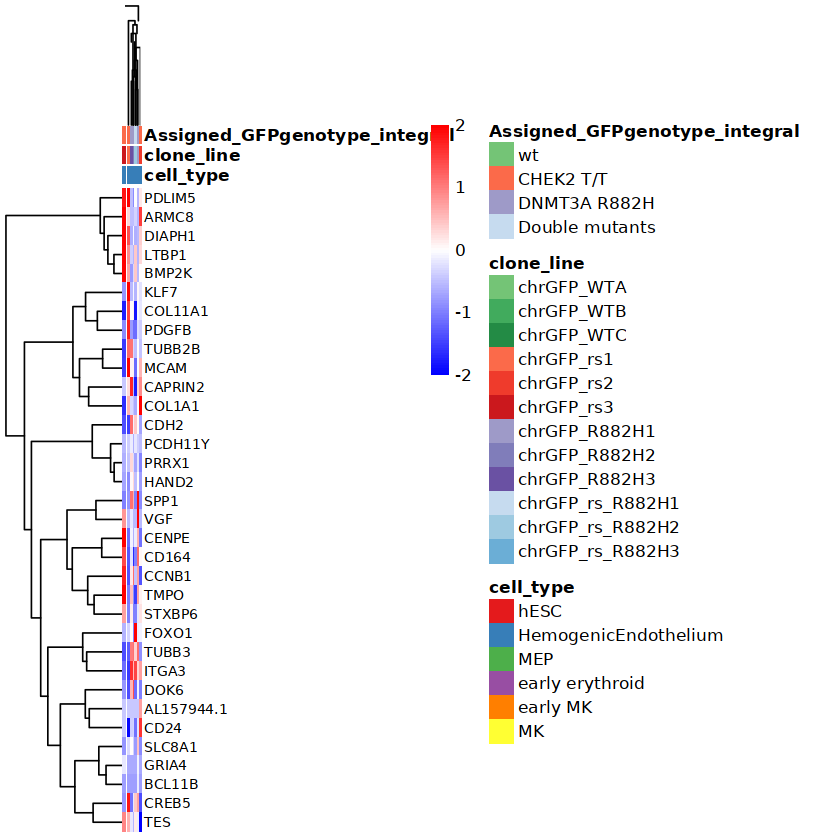

In [368]:
 heatmap<-pheatmap(GeneEXP_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                    angle_col = "45",                    
                    fontsize_row = 8, 
                    fontsize_col = 8,
                   clustering_method="ward.D2",
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,                  
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [369]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis/")

In [370]:
#dir.create('graphs')

In [371]:
setwd("graphs/")

In [372]:
svgname<-paste(paste("Heatmap","start",'2','HemogenicEndothelium', sep='_'),".svg",sep='')

ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)
